<a href="https://colab.research.google.com/github/Gitagnieszka/bootcamp_data_science/blob/main/Projekt_01_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study - Bank Loan Status Classification

**Description of the problem and data**
- **Problem**
The problem relates to a bank that faces a challenge, identifying the causes and determining which customers are entering "Charged off" credit status. 

- **Objective of the analysis** 
They set themselves the goal of identifying segments and trying to describe/define such customers, hence the model must be interpretable. 

- **Data set**
The source data is from Kaggle.
The data consists of a training dataset that includes both input and output variables, but in the test set target variable is not present so I will only take the training dataset for further analysis.

- **Target variable**
Loan Status is the target variable. 


<br>

-  Input variables:

    	Loan ID

    	Customer ID

    	Loan Status                   

    	Current Loan Amount

    	Term

    	Credit Score

    	Annual Income

    	Years in current job

    	Home Ownership

    	Purpose

    	Monthly Debt

    	Years of Credit History

    	Months since last delinquent

    	Number of Open Accounts

    	Number of Credit Problems

    	Current Credit Balance

    	Maximum Open Credit

    	Bankruptcies

    	Tax Liens



## **Exploratory Data Analysis**

### Import the relevant python libraries for the analysis

In [ ]:
# data analysis and wrangling
# for basic operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import random as rnd
from collections import Counter
from collections import OrderedDict


# # for data visualizations
import seaborn as sns # data visualization library
sns.set_theme(style="white")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline
from itertools import cycle # used for cycling colors at plotly graphs
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn import preprocessing #for scalling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew

!pip install imblearn
!pip install -U imbalanced-learn 
#oversampling, overcoming imbalance problem
import imblearn

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
!pip install graphviz
import graphviz #visualize decision-trees with graphviz
from sklearn import tree

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

#for purmutation importance
!pip install eli5
import eli5 
from eli5.sklearn import PermutationImportance

#for SHAP values
!pip install shap
import shap 
!pip install pdpbox
from pdpbox import pdp, info_plots #for partial plots

# for warning ignore
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\agnieszka\anaconda3\lib\site-packages\__pycache__\pylab.cpython-39.pyc
   from C:\Users\Agnieszka\AppData\Local\Temp\pip-uninstall-itgeo15w\pylab.cpython-39.pyc
  Moving to c:\users\agnieszka\anaconda3\lib\site-packages\matplotlib-3.5.1-py3.9-nspkg.pth
   from C:\Users\Agnieszka\AppData\Local\Temp\pip-uninstall-s13vwfh5\matplotlib-3.5.1-py3.9-nspkg.pth
  Moving to c:\users\agnieszka\anaconda3\lib\site-packages\matplotlib-3.5.1.dist-info\
   from C:\Users\Agnieszka\anaconda3\Lib\s

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Agnieszka\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Agnieszka\\AppData\\Local\\Temp\\pip-install-lrcreif3\\matplotlib_a41b7d6c10a34f51bdeff74acbf59f90\\setup.py'"'"'; __file__='"'"'C:\\Users\\Agnieszka\\AppData\\Local\\Temp\\pip-install-lrcreif3\\matplotlib_a41b7d6c10a34f51bdeff74acbf59f90\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Agnieszka\AppData\Local\Temp\pip-wheel-c22ko582'
       cwd: C:\Users\Agnieszka\AppData\Local\Temp\pip-install-lrcreif3\matplotlib_a41b7d6c10a34f51bdeff74acbf59f90\
  Complete output (499 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib

ModuleNotFoundError: No module named 'pdpbox'

  copying lib\matplotlib\mpl-data\stylelib\seaborn-white.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\fonts\afm\cmex10.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  creating build\lib.win-amd64-3.9\matplotlib\backends\web_backend\js
  copying lib\matplotlib\backends\web_backend\js\mpl.js -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\js
  copying lib\matplotlib\mpl-data\fonts\pdfcorefonts\Courier-Oblique.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\pdfcorefonts
  copying lib\matplotlib\mpl-data\images\filesave_large.png -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\images\help.pdf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  creating build\lib.win-amd64-3.9\matplotlib\backends\web_backend\css
  copying lib\matplotlib\backends\web_backend\css\fbm.css -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\css
  copying lib\matplotlib\mpl-

  copying lib\matplotlib\mpl-data\images\subplots.svg -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\fonts\ttf\DejaVuSansMono-Oblique.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
  copying lib\matplotlib\mpl-data\fonts\ttf\STIXSizTwoSymReg.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
  copying lib\matplotlib\backends\web_backend\jquery-ui-1.12.1\index.html -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\jquery-ui-1.12.1
  copying lib\matplotlib\backends\web_backend\css\boilerplate.css -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\css
  copying lib\matplotlib\mpl-data\images\forward_large.png -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\images\move_large.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\backends\web_backend\ipython_inline_figure.html -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend
  copyin

Additional options

In [ ]:
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

### Collect and understand the data

#### Data load

In [ ]:
#To start when using the Google Colab

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True) #drive.mount('/content/drive')

In [ ]:
#test_df = pd.read_csv('/content/drive/MyDrive/credit_test/credit_test.csv')
#train_df = pd.read_csv('/content/drive/MyDrive/credit_train/credit_train.csv')

In [ ]:
#To start when using the Jupyter Notebook
# reading the CSV file, 2 files one for training and other for testing
test_df = pd.read_csv('credit_test/credit_test.csv')
train_df = pd.read_csv('credit_train/credit_train.csv')

#### Analyze by describing data

In [ ]:
test_df.shape

(10353, 18)

In [ ]:
train_df.shape

(100514, 19)

In [ ]:
train_df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
test_df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
# reading the head of the data // to view the data
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Since I will use only one set I will assign it a name: data

In [ ]:
data = train_df.copy()

For a quick look at the data - visualization.

In [ ]:
#https://seaborn.pydata.org/tutorial/color_palettes.html
#colors = sns.color_palette('pastel')
#colors = sns.color_palette('muted')
#colors = sns.color_palette('bright')
#colors = sns.color_palette('colorblind')
#colors = sns.color_palette('deep')
#colors = sns.color_palette('dark')
colors = sns.color_palette()
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
#If you want the names of numeric columns:
num_cols =  data.select_dtypes(include=np.number).columns.tolist()

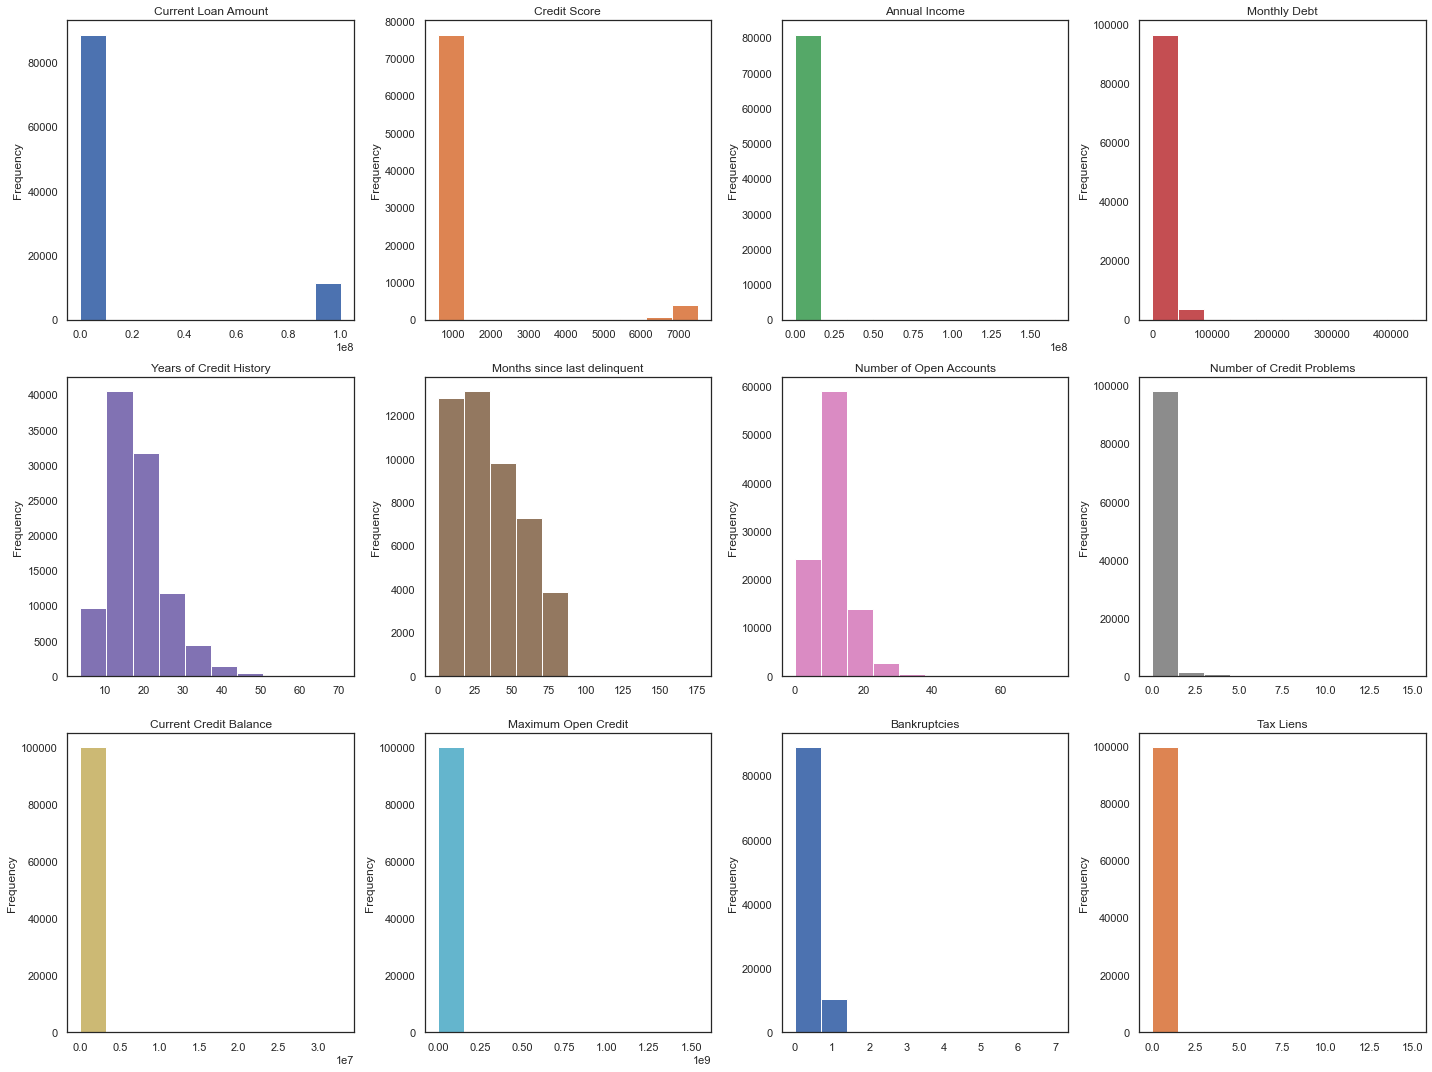

In [ ]:
#data.hist(bins=25,figsize=(20,10));

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
ax_idx = 0
columns = data.select_dtypes(include=np.number).columns.tolist()
#columns = data.select_dtypes(include=np.number).drop('Loan Status', axis = 1).columns
for col in columns:
    data[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

#plt.suptitle('Just for a quick preview', fontweight ="bold")
plt.tight_layout()
plt.show()

In [ ]:
data.select_dtypes(exclude=np.number).columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')

In [ ]:
data.select_dtypes(include=np.number).columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

[Text(0, 0, 'Home Improvements'),
 Text(1, 0, 'Debt Consolidation'),
 Text(2, 0, 'Buy House'),
 Text(3, 0, 'other'),
 Text(4, 0, 'Business Loan'),
 Text(5, 0, 'Buy a Car'),
 Text(6, 0, 'major_purchase'),
 Text(7, 0, 'Take a Trip'),
 Text(8, 0, 'Other'),
 Text(9, 0, 'small_business'),
 Text(10, 0, 'Medical Bills'),
 Text(11, 0, 'wedding'),
 Text(12, 0, 'vacation'),
 Text(13, 0, 'Educational Expenses'),
 Text(14, 0, 'moving'),
 Text(15, 0, 'renewable_energy')]

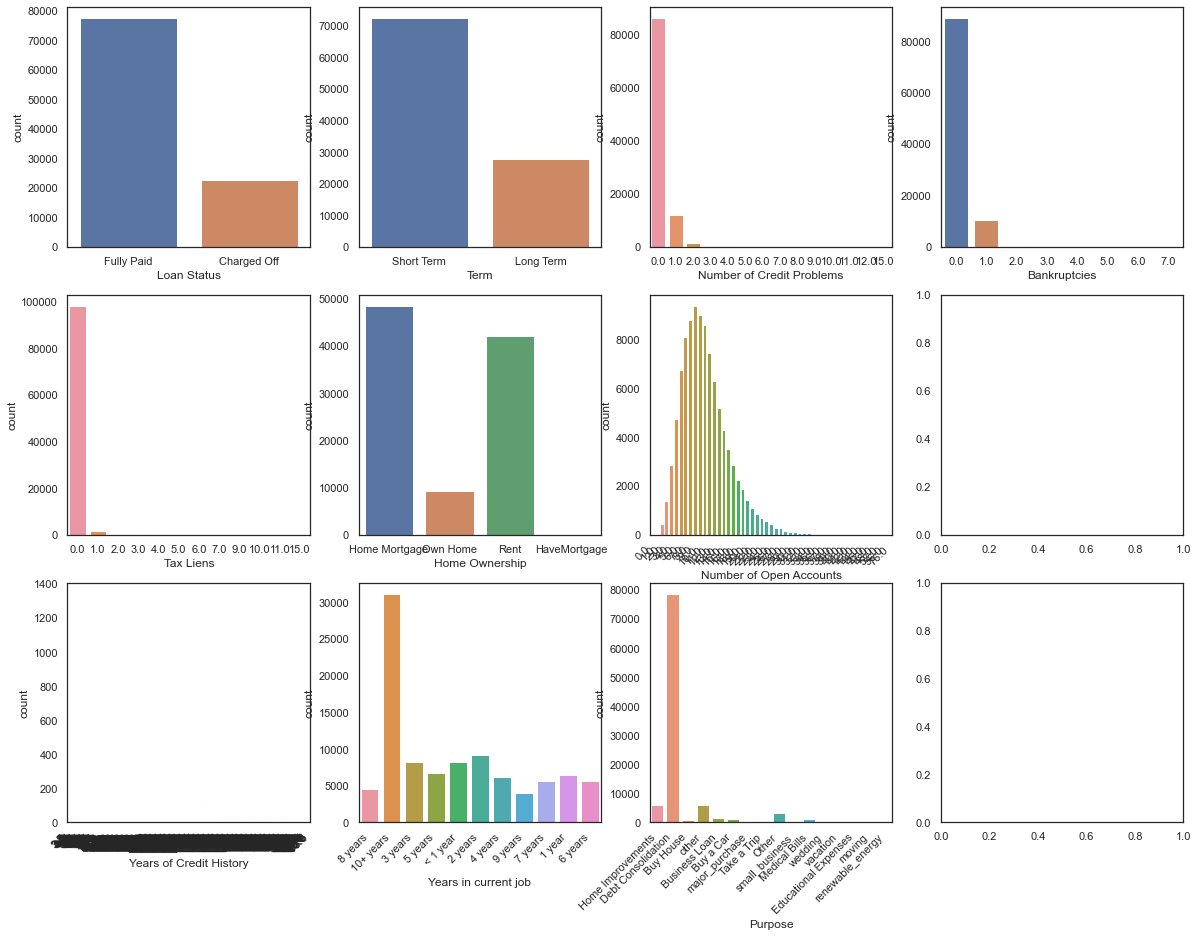

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
sns.countplot('Loan Status',data=data,ax=axes[0,0])
sns.countplot('Term',data=data,ax=axes[0,1])
sns.countplot('Number of Credit Problems',data=data,ax=axes[0,2])
sns.countplot('Bankruptcies',data=data,ax=axes[0,3])
sns.countplot('Tax Liens',data=data,ax=axes[1,0])
sns.countplot('Home Ownership',data=data,ax=axes[1,1])

chart = sns.countplot('Number of Open Accounts',data=data,ax=axes[1,2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

chart = sns.countplot('Years of Credit History',data=data,ax=axes[2,0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

chart = sns.countplot('Years in current job',data=data,ax=axes[2,1]) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

chart = sns.countplot('Purpose',data=data,ax=axes[2,2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(1, 0, 'Current Loan Amount'),
 Text(2, 0, 'Credit Score'),
 Text(3, 0, 'Annual Income'),
 Text(4, 0, 'Monthly Debt'),
 Text(5, 0, 'Years of Credit History'),
 Text(6, 0, 'Months since last delinquent'),
 Text(7, 0, 'Number of Open Accounts'),
 Text(8, 0, 'Number of Credit Problems'),
 Text(9, 0, 'Current Credit Balance'),
 Text(10, 0, 'Maximum Open Credit'),
 Text(11, 0, 'Bankruptcies'),
 Text(12, 0, 'Tax Liens')]

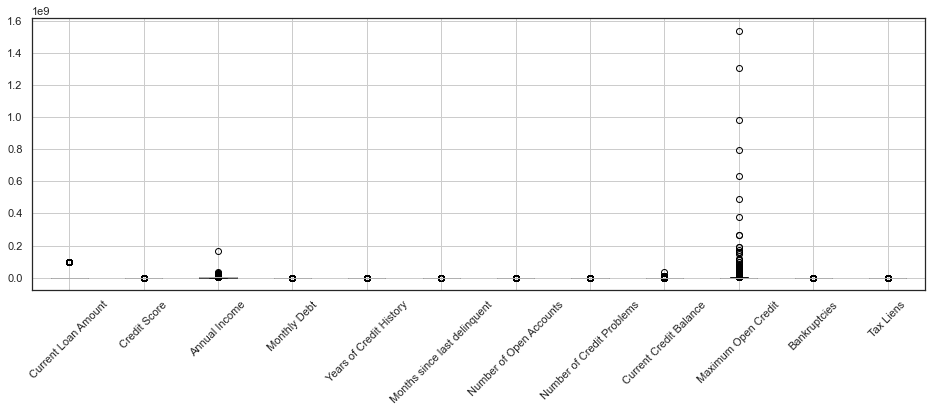

In [ ]:
#quick overview
ax = data.boxplot(figsize=(16, 5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45) 

In [ ]:
#by calling the shape attribute of the  dataset we can observe that there are 100514 observations and 19 columns - in the train
#in the data set
#len(data.index) # 37778
obs = data.shape[0]
#print(f"number of observations: {obs}")
count_row = data.shape[0]  # Gives number of rows

count_col = data.shape[1]  # Gives number of columns
print(f"Collected data: ")
print(f"Total rows/entries in data : {data.shape[0]}")
print("Total columns/features in data : {}".format(data.shape[1]))
#data.shape

Collected data: 
Total rows/entries in data : 100514
Total columns/features in data : 19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
#n_names=len(data.select_dtypes(include=['object']).columns)
#n_names
print(f"In data we have two types of variables: float64 and object. In the dataset we have:: ")
print(f" - {len(data.select_dtypes(exclude=['object']).columns)} - number / float64 variables and: ")
print(f" - {len(data.select_dtypes(include=['object']).columns)} object variables (including target variable) ")

In data we have two types of variables: float64 and object. In the dataset we have:: 
 - 12 - number / float64 variables and: 
 - 7 object variables (including target variable) 


In data we have two types of variables: float64 and object.
In the dataset we have: 
- 12 number / float64 variables and
- 7 object variables (including target variable) 

All column name - variable used for analysis

In [ ]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Variable analysis: type, variability, % of missing data

In [ ]:
# identify datatypes of the 47 columns, add the stats to the datadict
datadict = pd.DataFrame(data.dtypes)

In [ ]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = (data.isnull().sum())

#another options
#finding null data
#data.apply(lambda x : sum(x.isnull()))

In [ ]:
#pandas: Detect and count missing values (NaN) with isnull(), isna()  - very helpful :) 
#https://note.nkmk.me/en/python-pandas-nan-judge-count/

In [ ]:
datadict['Ratio_of_MissingVal'] = np.round(data.isnull().sum()/len(data)*100,2)   #np.round(ratio, 2)

In [ ]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique'] = data.nunique()

#another options
#finding unique data
#data.apply(lambda x: len(x.unique()))

In [ ]:
# Identify the count for each variable, add the stats to datadict
datadict['Count'] = data.count()

Summary statement: data type, missing values, % percent of missing values, number of unique values, and count non missing 

In [ ]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
sorted_dict = datadict.sort_values(by=['DataType'], ascending=True)
sorted_dict

sorted_dict_ = sorted_dict.sort_values(by=['MissingVal','NUnique'], ascending=False)
sorted_dict_

,DataType,MissingVal,Ratio_of_MissingVal,NUnique,Count
Months since last delinquent,float64,53655,53.38,116,46859
Annual Income,float64,19668,19.57,36174,80846
Credit Score,float64,19668,19.57,324,80846
Years in current job,object,4736,4.71,11,95778
Bankruptcies,float64,718,0.71,8,99796
Tax Liens,float64,524,0.52,12,99990
Maximum Open Credit,float64,516,0.51,44596,99998
Loan ID,object,514,0.51,81999,100000
Customer ID,object,514,0.51,81999,100000
Monthly Debt,float64,514,0.51,65765,100000


**Observed**
- Based on the above, we need to consider removing variables that have a great more than 50% missing data, so=> **"Months since last delinquent"**
- variables that having almost 20% of missing data (19,57) **"Annual Income"** and **"Credit Score"**, I will leave because they can / I assume that they can strongly affect the target variable, for later verification but it means that I will have to fill in these data,
- Customer id , and Loand ID - because they carry the same value, but only after checking the duplicates,
- Features which have many unique variables, as **"Years of Credit History"** and **"Number of Open Accounts"**: I will create from them categorical variables 
- In addition, what I found out that there are **514 rows in this dataset that do not have the target variable filled** - I will not need them so I will remove them
- looks like some of the records are duplicated I will have to look into it

#### The search for duplicated and unique values

-  a. The dataset contain duplicate values
-  b. The dataset contain not only unique values

In [ ]:
# a. Checking duplicate values
print(data.duplicated().value_counts())

False    89786
True     10728
dtype: int64


In [ ]:
#pd.set_option('display.max_rows', data.shape[0]+1)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!! zajmuje bardzo duzo output, przez to plik jest duzo wazy, finalnie nie pokazuje tego
# b. Checking unique values
#columns = data.columns
#for col in columns:
#    print(col,':\n',data[col].unique())
#    print(data[col].value_counts())
#    print('\n',50*'##','\n')

It looks like we have duplicate records for Loan ID and Customer ID. 
Perhaps the data for them comes from a different date in time. 
For customers who have dublikats, there are no different values for the target variable

In [ ]:
data[data['Loan ID'] == '1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e']
#data.loc[(data['Loan ID'] == '1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
17926,1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e,3b5f11f9-0951-43e2-bed5-d24d1e4e8b76,Fully Paid,242154.0,Short Term,719.0,798475.0,4 years,Rent,Debt Consolidation,23754.75,17.0,NaN,11.0,0.0,337326.0,1176450.0,0.0,0.0
88664,1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e,3b5f11f9-0951-43e2-bed5-d24d1e4e8b76,Fully Paid,242154.0,Short Term,NaN,NaN,4 years,Rent,Debt Consolidation,23754.75,17.0,NaN,11.0,0.0,337326.0,1176450.0,0.0,0.0


In [ ]:
data[data['Customer ID'] == 'add9dac6-c1ad-4441-ba96-274fbf493379']
#data.loc[(data['Customer ID'] == 'add9dac6-c1ad-4441-ba96-274fbf493379')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
17942,111602d9-f958-403d-a9d5-4fba630297eb,add9dac6-c1ad-4441-ba96-274fbf493379,Fully Paid,579370.0,Long Term,723.0,1347157.0,10+ years,Home Mortgage,Debt Consolidation,29525.24,22.4,NaN,15.0,0.0,591850.0,1496264.0,0.0,0.0
24976,111602d9-f958-403d-a9d5-4fba630297eb,add9dac6-c1ad-4441-ba96-274fbf493379,Fully Paid,579370.0,Long Term,723.0,1347157.0,10+ years,Home Mortgage,Debt Consolidation,29525.24,22.4,NaN,15.0,0.0,591850.0,1496264.0,0.0,0.0


In [ ]:
#differences on this client are found in the variable "Creedit Score"
data[data['Customer ID'] == 'ee3c27f2-766a-499c-9a96-d17c4d2faa16']
#data.loc[(data['Customer ID'] == 'ee3c27f2-766a-499c-9a96-d17c4d2faa16')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7415,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,49927.44,15.1,5.0,22.0,0.0,526414.0,1090386.0,0.0,0.0
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526.0,Short Term,716.0,2065965.0,10+ years,Home Mortgage,Home Improvements,49927.44,15.1,5.0,22.0,0.0,526414.0,1090386.0,0.0,0.0


In [ ]:
# UWAGA!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# zajmuje bardzo duzo output, przez to plik duzo wazy, finalnie zamiana na head(20) zmniejsza plik
grouped = data.groupby(['Loan ID', 'Customer ID']).aggregate({'Loan Status' : ['nunique', 'count']})
grouped.head(20)

Loan Status  \
                                                                              nunique   
Loan ID                              Customer ID                                        
0000757f-a121-41ed-b17b-162e76647c1f dde79588-12f0-4811-bab0-e2b07f633fcd           1   
0000afa6-8902-4f8f-b870-25a8fdad0aeb e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc           1   
00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6 c9decd06-16f7-44c3-b007-8776f2a9233d           1   
00045ecd-59e9-4752-ba0d-679ff71692b3 b7bce684-b4b0-4b29-af66-eae316bce573           1   
0004f37b-5859-40f6-98d0-367aa3b3f3f1 f662b062-5fa5-463d-b5c0-4e36d09fcab1           1   
00053198-2da4-438f-9c77-5dac5a31703a 6ec7f3a2-d3f4-421b-8a52-ccbaa7895f90           1   
000582b2-2b2e-4290-9360-43e3a93b57c2 bafabc36-a32f-489c-9531-896ff66c9171           1   
00069ff1-a877-4d35-81be-7cd359b99956 ee3c27f2-766a-499c-9a96-d17c4d2faa16           1   
0006dbc6-15b5-4223-8f2a-5e3498fbf9a9 4c28511b-a12f-4985-8bcd-cc989511172e           1   
0008255a-402e-4716-9e0a-8bdf55309781 4e25b6bf-9abc-4bbd-841e-c5a8403b68de           1   
0008cacc-1ea9-4599-b114-12709b13c85d cd853967-4535-4d36-bf93-269504c74911           1   
000a0abe-b839-414d-9b00-8ba33b47ebce b2f4c91c-0157-4529-af67-35ffeac65389           1   
000a4e53-0c08-4fce-a0c2-f634c3b77013 f245b790-562e-4aa1-bbc9-0acb030818ba           1   
000bc65a-6a7c-4566-86f3-203b4ec35eca 724bddb4-a23c-4759-ba6f-dc79c7dd5334           1   
000bc9de-0b39-4e53-ba71-222ec0fd2dc9 56e54a52-b16b-4d64-b6ae-2c636a45061b           1   
000bce36-32bf-4cea-a625-8e7ee9175383 677addbe-c331-47cb-a6c5-4a461b7e7f87           1   
000c0c27-1961-4336-b760-a300e1bce9b0 881edf98-387c-4eef-ab71-317a7a5e70c1           1   
000c16df-c24f-41cf-a90e-60301d131bb9 b07c4262-70bb-41cc-b28a-d87540577fb1           1   
000dada0-f2a3-4d6d-b9d2-284939e7cc7d f7f2f882-1904-4002-8121-9be4ee9143de           1   
000dbdf1-3926-4676-bb4f-fe40c242a46e 5165c688-1669-43e9-88b5-db212c72655c           1   

                                                                                 
                                                                          count  
Loan ID                              Customer ID                                 
0000757f-a121-41ed-b17b-162e76647c1f dde79588-12f0-4811-bab0-e2b07f633fcd     1  
0000afa6-8902-4f8f-b870-25a8fdad0aeb e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc     1  
00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6 c9decd06-16f7-44c3-b007-8776f2a9233d     1  
00045ecd-59e9-4752-ba0d-679ff71692b3 b7bce684-b4b0-4b29-af66-eae316bce573     1  
0004f37b-5859-40f6-98d0-367aa3b3f3f1 f662b062-5fa5-463d-b5c0-4e36d09fcab1     1  
00053198-2da4-438f-9c77-5dac5a31703a 6ec7f3a2-d3f4-421b-8a52-ccbaa7895f90     1  
000582b2-2b2e-4290-9360-43e3a93b57c2 bafabc36-a32f-489c-9531-896ff66c9171     1  
00069ff1-a877-4d35-81be-7cd359b99956 ee3c27f2-766a-499c-9a96-d17c4d2faa16     2  
0006dbc6-15b5-4223-8f2a-5e3498fbf9a9 4c28511b-a12f-4985-8bcd-cc989511172e     1  
0008255a-402e-4716-9e0a-8bdf55309781 4e25b6bf-9abc-4bbd-841e-c5a8403b68de     1  
0008cacc-1ea9-4599-b114-12709b13c85d cd853967-4535-4d36-bf93-269504c74911     1  
000a0abe-b839-414d-9b00-8ba33b47ebce b2f4c91c-0157-4529-af67-35ffeac65389     1  
000a4e53-0c08-4fce-a0c2-f634c3b77013 f245b790-562e-4aa1-bbc9-0acb030818ba     1  
000bc65a-6a7c-4566-86f3-203b4ec35eca 724bddb4-a23c-4759-ba6f-dc79c7dd5334     2  
000bc9de-0b39-4e53-ba71-222ec0fd2dc9 56e54a52-b16b-4d64-b6ae-2c636a45061b     1  
000bce36-32bf-4cea-a625-8e7ee9175383 677addbe-c331-47cb-a6c5-4a461b7e7f87     1  
000c0c27-1961-4336-b760-a300e1bce9b0 881edf98-387c-4eef-ab71-317a7a5e70c1     1  
000c16df-c24f-41cf-a90e-60301d131bb9 b07c4262-70bb-41cc-b28a-d87540577fb1     2  
000dada0-f2a3-4d6d-b9d2-284939e7cc7d f7f2f882-1904-4002-8121-9be4ee9143de     1  
000dbdf1-3926-4676-bb4f-fe40c242a46e 5165c688-1669-43e9-88b5-db212c72655c     1

In [ ]:
#Given that I have a large enough dataset to continue building models I decide to remove the doubles. 
data.drop_duplicates(inplace = True)

In [ ]:
#checking if still I have duplicated rekords
data.duplicated().sum()

0

#### Visualization of Null Values

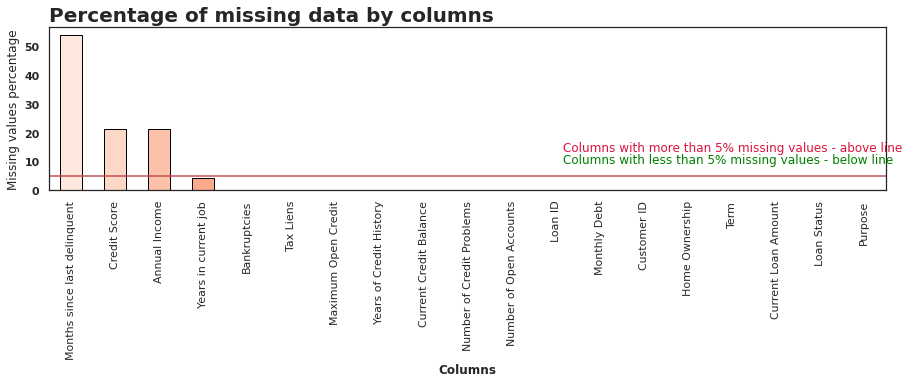

In [ ]:
def msv_1(data, thresh = 5, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Percentage of missing data by columns', fontsize=20, weight='bold' , loc='left')
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12, f'Columns with more than {thresh}% missing values - above line', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 8, f'Columns with less than {thresh}% missing values - below line', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=12, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(data, 5, color=sns.color_palette('Reds',12))

In [ ]:
data_null = data[data['Loan Status'].isnull()]

In [ ]:
data_null

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_null.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit Score,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual Income,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Debt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of Credit History,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months since last delinquent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Open Accounts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Credit Problems,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Credit Balance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maximum Open Credit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_null.describe(include=['object']).T

,count,unique,top,freq
Loan ID,0,0,NaN,NaN
Customer ID,0,0,NaN,NaN
Loan Status,0,0,NaN,NaN
Term,0,0,NaN,NaN
Years in current job,0,0,NaN,NaN
Home Ownership,0,0,NaN,NaN
Purpose,0,0,NaN,NaN


### Preparation and Cleaning of Data

#### Deted and remove outliers in numerical variables

One of the problems we always want to look out for when performing EDA are anomalies in the data. These can be due to misspelled numbers, human error, systems error, or they can be actual values but extreme measurements. One way to support anomalies is to look at column statistics using a descriptive method. 

 Run discriptive statistics of object and numerical datatypes.

In [ ]:
### Summary statistics of the numerical columns in the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,89785.0,1.306089e+07,3.329556e+07,10802.0,180268.0,313874.00,532378.00,1.000000e+08
Credit Score,70631.0,1.130831e+03,1.571037e+03,585.0,708.0,729.00,742.00,7.510000e+03
Annual Income,70631.0,1.375894e+06,1.104852e+06,76627.0,847932.0,1168975.00,1648915.00,1.655574e+08
Monthly Debt,89785.0,1.839691e+04,1.214528e+04,0.0,10157.4,16140.31,23918.91,4.358433e+05
Years of Credit History,89785.0,1.824864e+01,7.034607e+00,3.6,13.5,17.00,21.70,7.050000e+01
Months since last delinquent,41448.0,3.497587e+01,2.200859e+01,0.0,16.0,32.00,51.00,1.760000e+02
Number of Open Accounts,89785.0,1.112325e+01,4.998884e+00,0.0,8.0,10.00,14.00,7.600000e+01
Number of Credit Problems,89785.0,1.649830e-01,4.780105e-01,0.0,0.0,0.00,0.00,1.500000e+01
Current Credit Balance,89785.0,2.940351e+05,3.722277e+05,0.0,112936.0,209722.00,367517.00,3.287897e+07
Maximum Open Credit,89783.0,7.756565e+05,8.803517e+06,0.0,277068.0,472692.00,791450.00,1.539738e+09


In [ ]:
data.describe(include=['object']).T

,count,unique,top,freq
Loan ID,89785,81999,387f3adf-a02d-4063-be16-6c9a2b4cf425,2
Customer ID,89785,81999,8febb4c1-83a3-4391-a988-e2fe6a947be0,2
Loan Status,89785,2,Fully Paid,67146
Term,89785,2,Short Term,66023
Years in current job,85983,11,10+ years,27755
Home Ownership,89785,4,Home Mortgage,43548
Purpose,89785,16,Debt Consolidation,70834


From the above summary statistics, we can see that there are outliers present in the data. We will take care of these in the next sections.

In [ ]:
#col=data.columns.str.replace(' ','_')
#data.columns = col

In [ ]:
def detect_outliers(data, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = data[(data[feature] < Q1 - outlier_step) | (data[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(data.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(data, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
We will drop these 0 indices:  []


I will drop these rows from the dataset.

In [ ]:
### Drop outliers and reset index

print("Before removing outliers : {} rows".format(len(data)))
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After removing outliers : {} rows".format(len(data)))

Before removing outliers : 89786 rows
After removing outliers : 89786 rows


In [ ]:
### Lets look at the new dataset
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


#### Dealing with missing variables

In [ ]:
# drop column -> column with more than 50% of missing values 
data = data.drop(columns = 'Months since last delinquent', axis=1)

In [ ]:
# dropping Loand ID and Customer ID, they do not bring, any business value
data.drop(columns=['Loan ID','Customer ID'],axis=1, inplace=True )

In [ ]:
#drop row -> where the target variable is not labeled I will drop
data.dropna(subset=["Loan Status"] , inplace = True)

In [ ]:
def check_missing_values(data):
        # Total missing values
        missing_values = data.isnull().sum()
        
        # Percentage of missing values
        misssing_in_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        missing_in_table = pd.concat([missing_values, misssing_in_percent], axis=1)
        
        # Rename the columns
        missing_in_table_ = missing_in_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        missing_in_table_ = missing_in_table_[missing_in_table_.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        return missing_in_table_

In [ ]:
check_missing_values(data)

,Missing Values,% of Total Values
Credit Score,19154,21.3
Annual Income,19154,21.3
Years in current job,3802,4.2
Bankruptcies,190,0.2
Tax Liens,9,0.0
Maximum Open Credit,2,0.0


In [ ]:
#deletion of rows with missing data from the target column cleaned up the dataset and thus, the remaining observations in the columns listed below - now no longer have missing data
#-  Loan ID,  Customer ID, Monthly Debt, Current Credit Balance, Current Loan, Years of Credit History, Number of Open Accounts, Purpose	object, Number of Credit Problems, Home Ownership,  Term,    
#

##### Filling NaN in categorical features:
- Years in current job

In [ ]:
#data['Years in current job'].hist()
data['Years in current job'].value_counts(dropna=False)

10+ years    27755
2 years       8254
< 1 year      7365
3 years       7339
5 years       6136
1 year        5832
4 years       5511
6 years       5134
7 years       4989
8 years       4121
NaN           3802
9 years       3547
Name: Years in current job, dtype: int64

In [ ]:
#before filling, I have to convert variable to number
data['Years in current job'].fillna('99', inplace=True) #usually we can fill missing values with "NotGiven" category , data['Years in current job'].fillna('NotGiven', inplace=True)

In [ ]:
#before filling, I have to convert variable to number
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")
data['Years in current job'] =data['Years in current job'].astype(float)

In [ ]:
#convert dummy values by Nan, and later on by median
data['Years in current job']=data['Years in current job'].replace({99:np.NaN})
# Fill NaN Values in One Column with Median
data['Years in current job']=data['Years in current job'].fillna(data['Years in current job'].median())
data['Years in current job'].value_counts(dropna=False)

10.0    27755
1.0     13197
6.0      8936
2.0      8254
3.0      7339
5.0      6136
4.0      5511
7.0      4989
8.0      4121
9.0      3547
Name: Years in current job, dtype: int64

- Purpose 

In [ ]:
data['Purpose'].value_counts(dropna=False)

Debt Consolidation      70834
Home Improvements        5237
other                    5235
Other                    2882
Business Loan            1366
Buy a Car                1165
Medical Bills             983
Buy House                 582
Take a Trip               488
major_purchase            330
small_business            255
moving                    135
wedding                   105
Educational Expenses       91
vacation                   89
renewable_energy            8
Name: Purpose, dtype: int64

We can fill misssing values with "NotGiven" category.

In [ ]:
data['Purpose'].fillna('NotGiven', inplace=True)

In [ ]:
data['Purpose'].value_counts()/len(data)

Debt Consolidation      0.788929
Home Improvements       0.058328
other                   0.058306
Other                   0.032099
Business Loan           0.015214
Buy a Car               0.012975
Medical Bills           0.010948
Buy House               0.006482
Take a Trip             0.005435
major_purchase          0.003675
small_business          0.002840
moving                  0.001504
wedding                 0.001169
Educational Expenses    0.001014
vacation                0.000991
renewable_energy        0.000089
Name: Purpose, dtype: float64

In [ ]:
#Since we already have the same two categories "other" and "Other" I will combine them with one category
data['Purpose'] = data['Purpose'].replace({'other': 'Other'})

In [ ]:
#For the less frequent categories, I will combine them into one and then attach it to the already created "Other
# Get a list of the top 6 neighborhoods
top10 = data['Purpose'].value_counts()[:6].index

# At locations where the Purposeis NOT in the top 6,  with meand around 1%
# replace the Purpose with 'OTHER'
data.loc[~data['Purpose'].isin(top10), 'Purpose'] = 'Other categories'

#Create categorical
data['Purpose'] = data['Purpose'].astype(pd.CategoricalDtype(categories=data['Purpose'].unique(),ordered=False))
data['Purpose'] = data['Purpose'].replace({'Other categories': 'Other'})
data['Purpose'].value_counts()

Debt Consolidation    70834
Other                 10200
Home Improvements      5237
Business Loan          1366
Buy a Car              1165
Medical Bills           983
Name: Purpose, dtype: int64

- Home Ownership

In [ ]:
data['Home Ownership'].value_counts(dropna=False)

Home Mortgage    43548
Rent             37855
Own Home          8199
HaveMortgage       183
Name: Home Ownership, dtype: int64

In [ ]:
#I will combine the sparse category "HaveMortgage" with "Home Mortgage" , the biggest one

In [ ]:
data['Home Ownership'] = data['Home Ownership'].replace({'HaveMortgage': 'Home Mortgage'})
data['Home Ownership'].value_counts(dropna=False)

Home Mortgage    43731
Rent             37855
Own Home          8199
Name: Home Ownership, dtype: int64

- Term

In [ ]:
data['Term'].value_counts(dropna=False)

Short Term    66023
Long Term     23762
Name: Term, dtype: int64

##### Filling numeric features:
- **Annual Income** 
- **Bankruptcies**
- **Maximum Open Credit** 
- **Tax Liens**
- **Credit Score** 





In [ ]:
#print column name which have missing values
data.columns[data.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

From the above data, we can see that there are missing values in the columns - ['Credit Score', 'Annual Income', 'Maximum Open Credit', 'Bankruptcies','Tax Liens']. 

For the variable "Annual Income" where there are almost 22% of missing values I will fill in the missing values from the distribution. 

The other variables 'Maximum Open Credit', 'Bankruptcies','Tax Liens' - I will fill in the missing values with the average value.

Variable Credit Score I will transform into a categorical variable and treat missing values as a separate category.

In [ ]:
data[list(data.columns[data.isnull().any()])].describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Score,70631.0,1.130831e+03,1.571037e+03,585.0,708.0,729.0,742.0,7.510000e+03
Annual Income,70631.0,1.375894e+06,1.104852e+06,76627.0,847932.0,1168975.0,1648915.0,1.655574e+08
Maximum Open Credit,89783.0,7.756565e+05,8.803517e+06,0.0,277068.0,472692.0,791450.0,1.539738e+09
Bankruptcies,89595.0,1.155310e-01,3.479190e-01,0.0,0.0,0.0,0.0,7.000000e+00
Tax Liens,89776.0,2.860453e-02,2.551075e-01,0.0,0.0,0.0,0.0,1.500000e+01


In [ ]:
### Looking at the missing values in the dataset
#print column name and how many missing values do we have
data[list(data.columns[data.isnull().any()])].isna().sum().sort_values(ascending = False)

Credit Score           19154
Annual Income          19154
Bankruptcies             190
Tax Liens                  9
Maximum Open Credit        2
dtype: int64

-  Handling missing values in variable: **Annual Income**

In [ ]:
data['Annual Income'].isna().sum()/len(data)  #missing values 19154/89785 -> 0.2133 -> 21,33%

0.21333184830428245

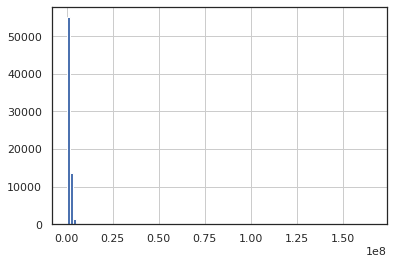

In [ ]:
data['Annual Income'].hist(bins = 100)

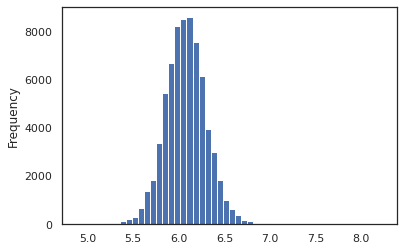

In [ ]:
data['Annual Income'] = np.log10(data['Annual Income'] + 1)
data['Annual Income'].plot.hist(bins=50)

We can estimate mean and std of created seminormal distribution for filling missing values.

In [ ]:
data['Annual Income'].fillna(
    pd.Series(
        [np.random.normal(loc=data['Annual Income'].mean(), 
                          scale=data['Annual Income'].std()) 
         for x in range(len(data))]
    ),
    inplace=True
)

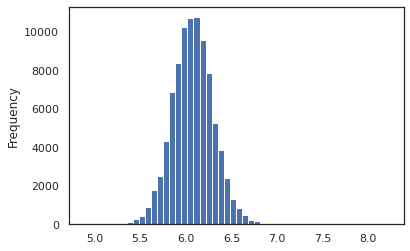

In [ ]:
data['Annual Income'].plot.hist(bins=50)

- Handling missing values in variable: **Bankruptcies**

In [ ]:
data['Bankruptcies'].isna().sum()/len(data)  #missing values 190/89785 -> 0.00211 -> 0.211%

0.0021161663975051512

In [ ]:
data['Bankruptcies'].value_counts(dropna=False)

0.0    79880
1.0     9233
2.0      369
NaN      190
3.0       82
4.0       24
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [ ]:
data['Bankruptcies'].unique()

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

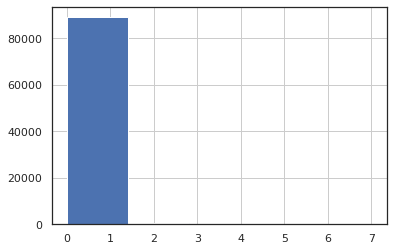

In [ ]:
data['Bankruptcies'].hist(bins = 5)

In [ ]:
data['Bankruptcies'].describe(percentiles=[.1, .2, .3, .4, .5, .6 , .7, .8, .9, 1]) 

count    89595.000000
mean         0.115531
std          0.347919
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          1.000000
100%         7.000000
max          7.000000
Name: Bankruptcies, dtype: float64

-  Handling missing values in variable: **Maximum Open Credit**

In [ ]:
data['Maximum Open Credit'].isna().sum()/len(data)  #missing values 2/89785 -> 2.2275435763212118e-05

2.2275435763212118e-05

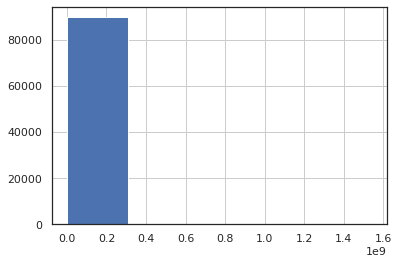

In [ ]:
data['Maximum Open Credit'].hist(bins = 5)

-  Handling missing values in variable: **Tax Liens**

In [ ]:
data['Tax Liens'].isna().sum()/len(data)  #missing values 9/89785 -> 0.00010023946093445453

0.00010023946093445453

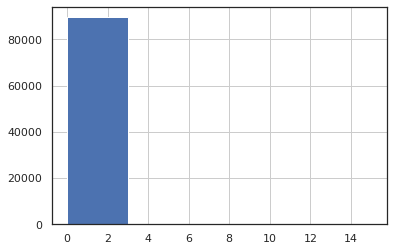

In [ ]:
data['Tax Liens'].hist(bins = 5)

In [ ]:
for col in ['Bankruptcies', 'Maximum Open Credit', 'Tax Liens']:
    data[col] = data[col].fillna(data[col].mean()) # Filling null values with the mean

-  Handling missing values in variable: **Credit Score**

In [ ]:
data['Credit Score'].isna().sum()/len(data)  #missing values 19154/89785 -> 0.2133 -> 21,33%

0.21333184830428245

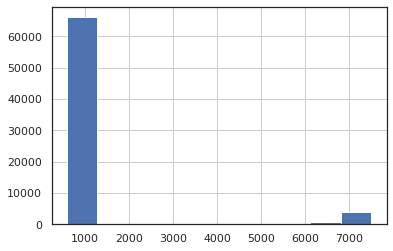

In [ ]:
data['Credit Score'].value_counts(dropna=False)
data['Credit Score'].hist()

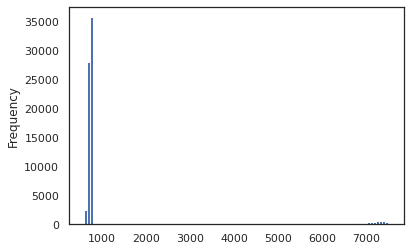

In [ ]:
data[data['Credit Score'] < 7510]['Credit Score'].plot.hist(bins = 100) # 7510 as maximum value


In [ ]:
#Based on the distribution of percentiles values, we see that the values above 749 have only 10% 
data['Credit Score'].describe(percentiles=[.1, .2, .3, .4, .5, .6 , .7, .8, .9, 1]) 

count    70631.000000
mean      1130.830598
std       1571.037395
min        585.000000
10%        683.000000
20%        702.000000
30%        714.000000
40%        721.000000
50%        729.000000
60%        735.000000
70%        740.000000
80%        744.000000
90%        749.000000
100%      7510.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [ ]:
(data[data['Credit Score'] > 749]['Credit Score'].count())/70631 #6508/70631  => 0.09 ==> 9% strange values, 10X time bigger than others

0.09214084467160312

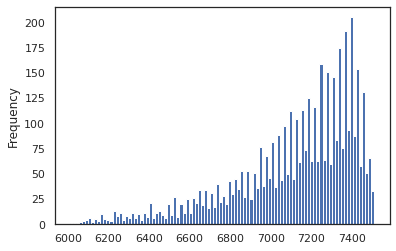

In [ ]:
data[data['Credit Score'] > 6000]['Credit Score'].count() #4536 rows
data[data['Credit Score'] > 6000]['Credit Score'].plot.hist(bins = 100)


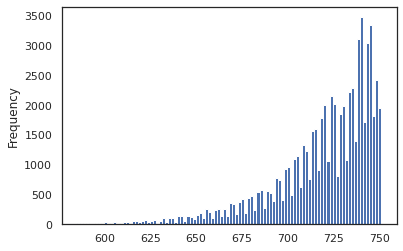

In [ ]:
#data[data['Credit Score'] < 6000]['Credit Score'].plot.hist(bins = 100)
#data[data['Credit Score'] < 1000]['Credit Score'].plot.hist(bins = 100)
data[data['Credit Score'] < 800]['Credit Score'].plot.hist(bins = 100)

#### Data trasformation

Due to ML models and Python require numerical input I have to transform categorical variables in numerical values

Observed:
- The score distribution looks strange, values greater than 749 I did not expect, it is rather a mistake. We usually expect a skewed distribution for this type of variable. I doubt if these values are correct so I will leave them in a separate basket and later on I use a transformation.

In [ ]:
data = (data.assign(Credit_Score_range=np.where(data['Credit Score']>=749,"4. >749",
                      np.where(np.logical_and(749>data['Credit Score'],data['Credit Score']>=729),"3. 730 - 742",
                      np.where(np.logical_and(729>data['Credit Score'],data['Credit Score']>=708),"2. 709 - 729",
                      np.where(np.logical_and(708>data['Credit Score'],data['Credit Score']>=585),"1.589 - 708","missing data"))))))
data= data.drop('Credit Score', axis=1)
data.columns = data.columns.str.replace('Credit_Score_range', 'Credit Score')
data['Credit Score'].value_counts(dropna=False)

3. 730 - 742    28055
missing data    19154
2. 709 - 729    18162
1.589 - 708     17079
4. >749          7335
Name: Credit Score, dtype: int64

In [ ]:
### Looking if the dataset has any more missing values apart from Type_of_Loan
data.isnull().sum().sort_values(ascending = False)

Loan Status                  0
Current Loan Amount          0
Term                         0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Credit Score                 0
dtype: int64

In [ ]:
#Summing up, now all varible are completed, and have no missing data  

#### Correlaction

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

In [ ]:
# Differnet way:. Encoding categorical features.
#data_concat['default'] = data_concat['default'].map({'yes': 1, 'no': 0})
#data_concat['y'] = data_concat['y'].map({'yes': 1, 'no': 0})
#data_concat
data['Loan Status'] = data['Loan Status'].map({'Fully Paid': 0, 'Charged Off': 1})

0    67146
1    22639
Name: Loan Status, dtype: int64


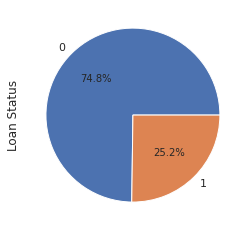

In [ ]:
data['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(data['Loan Status'].value_counts())

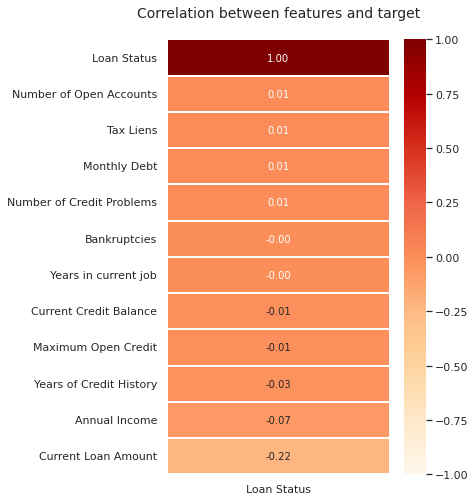

In [ ]:
# let's see correlation with our target
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(data.corr()[['Loan Status']].sort_values(by='Loan Status',ascending=False),
#heatmap = sns.heatmap(data.corr()[["Loan Status"]],
                      vmin=-1, vmax=1, annot=True, fmt='.2f',
                      #square=True, # make cells square
                      #cbar_kws={'fraction' : 0.01}, # shrink colour bar
                      cmap='OrRd', # use orange/red colour map
                      linewidth=1 # space between cells
                      )

#heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
#heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.title('Correlation between features and target\n', loc='center', fontsize=14);
plt.show()

In [ ]:
correlations = data.corr()['Loan Status'].sort_values()

In [ ]:
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(7))
print('\nMost Negative Correlations:\n', correlations.head(7))

Most Positive Correlations:
 Years in current job        -0.004088
Bankruptcies                -0.003449
Number of Credit Problems    0.006597
Monthly Debt                 0.012127
Tax Liens                    0.012711
Number of Open Accounts      0.013467
Loan Status                  1.000000
Name: Loan Status, dtype: float64

Most Negative Correlations:
 Current Loan Amount       -0.222108
Annual Income             -0.069169
Years of Credit History   -0.029460
Maximum Open Credit       -0.009571
Current Credit Balance    -0.009542
Years in current job      -0.004088
Bankruptcies              -0.003449
Name: Loan Status, dtype: float64


In [ ]:
#plt.figure(figsize=(20,15))
#sns.heatmap(data.corr(), annot= True)

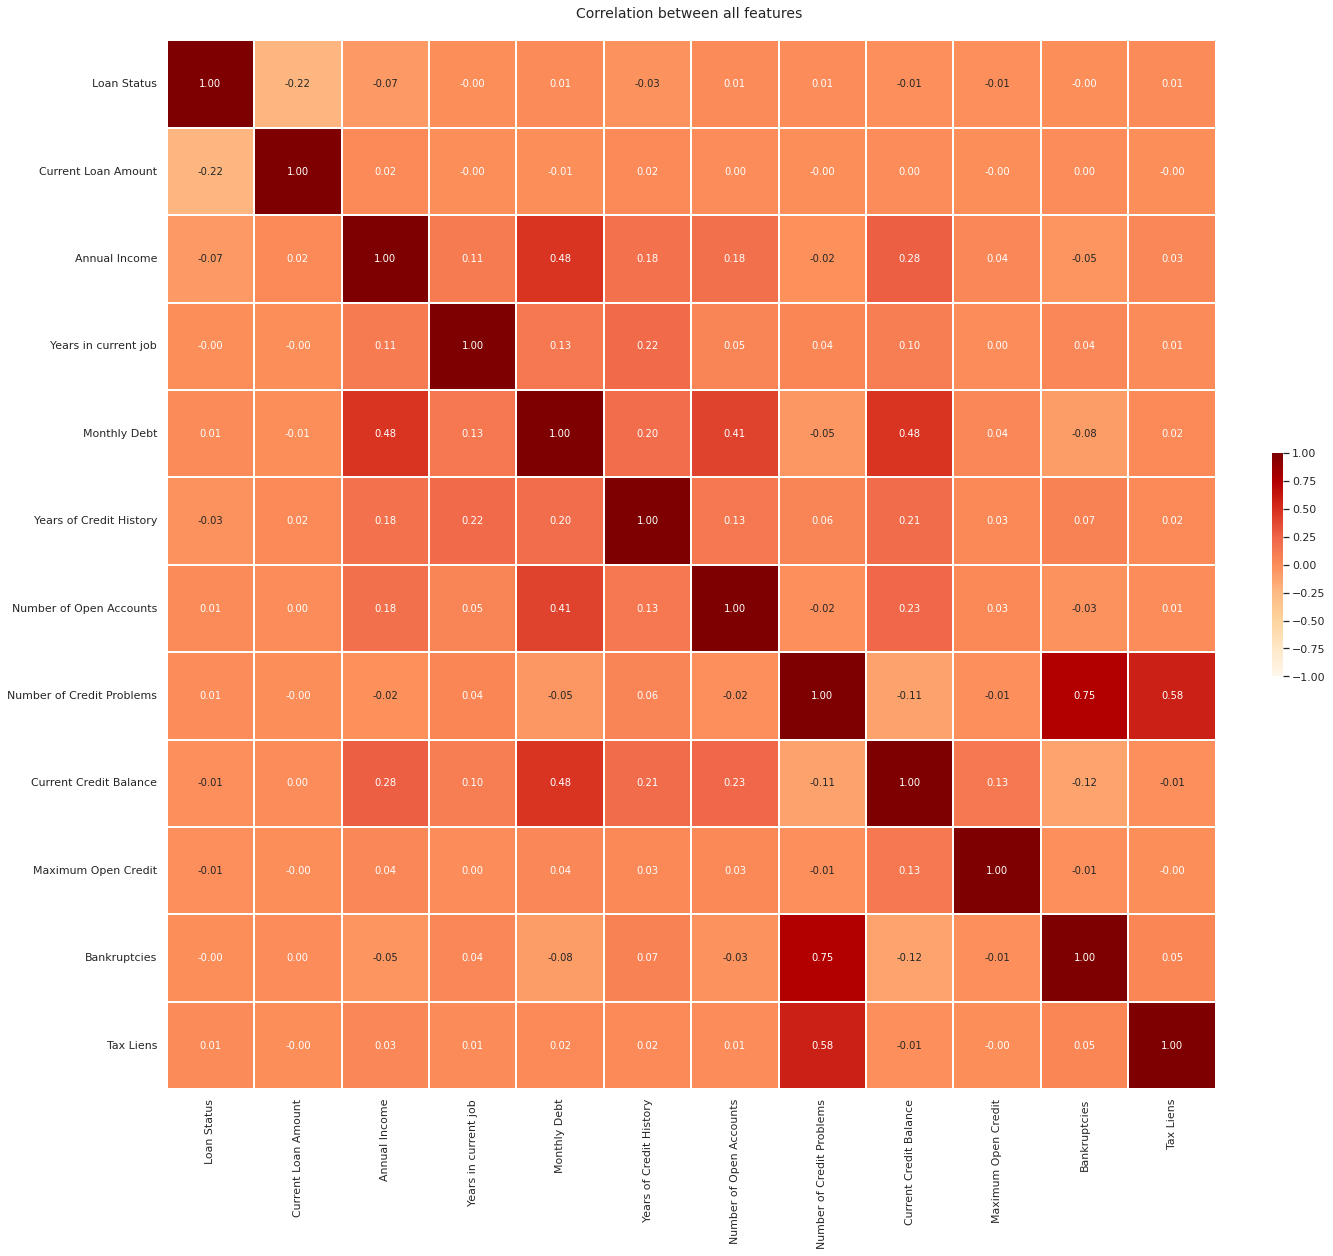

In [ ]:
# let's see correlation with our target
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(data.corr(),
                      vmin=-1, vmax=1, annot=True, fmt='.2f',
                      square=True, # make cells square
                      cbar_kws={'fraction' : 0.01}, # shrink colour bar
                      cmap='OrRd', # use orange/red colour map
                      linewidth=1 # space between cells
                      )

#heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
#heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.title('Correlation between all features \n', loc='center', fontsize=14);
plt.show()

**Observed**:

- "Bankruptcy" has a high correlation with "number of credit problems"
- "Tax liens" also have a high correlation with "number of credit problems"
- Monthly_debt has a high correlation with both, current credit balance, annual income and number of open accounts.

Drop out highly correlated features

In [ ]:
#Creating the Correlation matrix and Selecting the Upper trigular matrix
#So now we are creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features

In [ ]:
matrix = data.corr().abs()

In [ ]:
#Correlation matrix is diagonal and all the diagonal elements will be 1. I will chose upper triangular part of the correlation matrix and not include the diagonal elements. 
upper_ = matrix.where(np.triu(np.ones(matrix.shape),k=1).astype(np.bool))
#print(upper_)

In [ ]:
#Droping the column with high correlation
#So we are selecting the columns which are having absolute correlation greater than 0.7 and making a list of those columns named 'to_drop'.
to_drop = [column for column in upper_.columns if any(upper_[column] >= 0.5)]
print(); 
print(f'Columns which will we dropped: {to_drop}')
print(f'Number of columns which will we dropped: {len(to_drop)}')


Columns which will we dropped: ['Bankruptcies', 'Tax Liens']
Number of columns which will we dropped: 2


In [ ]:
#Now we are droping the columns which are in the list 'to_drop' from the dataframe
data.drop(['Bankruptcies', 'Tax Liens'], axis=1, inplace=True)
#Remove specific multiple columns
#data = data.drop(data.columns[to_drop], axis=1, inplace=True)
print(); 
#print(data.head())

In [ ]:
#chceking if it was dropeed
data.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Credit Score'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89785 entries, 0 to 89784
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Loan Status                89785 non-null  int64   
 1   Current Loan Amount        89785 non-null  float64 
 2   Term                       89785 non-null  object  
 3   Annual Income              89785 non-null  float64 
 4   Years in current job       89785 non-null  float64 
 5   Home Ownership             89785 non-null  object  
 6   Purpose                    89785 non-null  category
 7   Monthly Debt               89785 non-null  float64 
 8   Years of Credit History    89785 non-null  float64 
 9   Number of Open Accounts    89785 non-null  float64 
 10  Number of Credit Problems  89785 non-null  float64 
 11  Current Credit Balance     89785 non-null  float64 
 12  Maximum Open Credit        89785 non-null  float64 
 13  Credit Score               8978

#### Visualising Categorical features

Carryout univariate and multivariate analysis using graphical.

The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools.

Dividing variables into object and numeric

In [ ]:
(data.select_dtypes(include=['object']).columns)

Index(['Term', 'Home Ownership', 'Credit Score'], dtype='object')

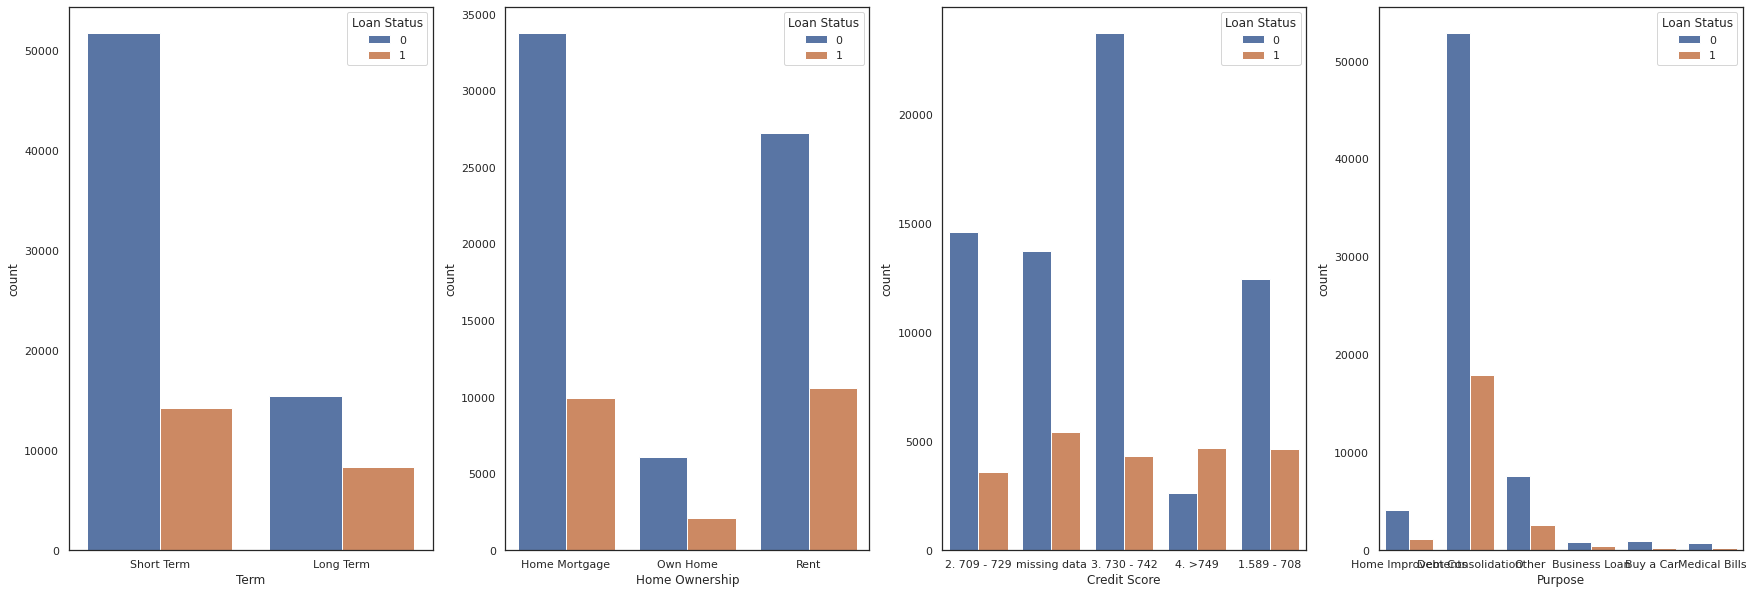

In [ ]:
sns.set_theme(style='white')  # or style='darkgrid' or palette = 'pastel'
sns.color_palette()
cat_features = data[['Term', 'Home Ownership', 'Credit Score' , 'Purpose']] # , do sprawdzenia czy tez Purpose
fig , ax = plt.subplots(1,4,figsize = (30,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cat_features, ax.flatten()):  sns.countplot(cat_features[i],hue = data['Loan Status'],ax = subplots)
plt.show()

In [ ]:
(data.select_dtypes(exclude=['object']).columns)

Index(['Loan Status', 'Current Loan Amount', 'Annual Income',
       'Years in current job', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit'],
      dtype='object')

Target variable : **Loan Status** 

In [ ]:
loan_status_counts = data['Loan Status'].value_counts(dropna=False) 
loan_status_counts

0    67146
1    22639
Name: Loan Status, dtype: int64

In [ ]:
#(loan_status_counts[1]/loan_status_counts[0])*100
Ratio = data['Loan Status'].value_counts()[1] / data['Loan Status'].value_counts()[0]
Ratio*100

33.71608137491437

The dataset is imbalanced  I will deal with it later

0    67146
1    22639
Name: Loan Status, dtype: int64


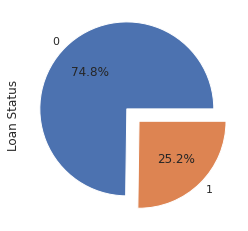

In [ ]:
data['Loan Status'].value_counts().plot(kind='pie', explode=[0.1,0.1], autopct='%1.1f%%')
print(data['Loan Status'].value_counts())

**First I will first look at the variables that are most positive correlated with the target variable.**

1.   **Years in current job**        
2.   **Number of Credit Problems**    
3.   **Monthly Debt**                 
5.   **Number of Open Accounts**     
6.   **Loan Status**                 

Variable 1 : **Years in current job vs. Loan Status**

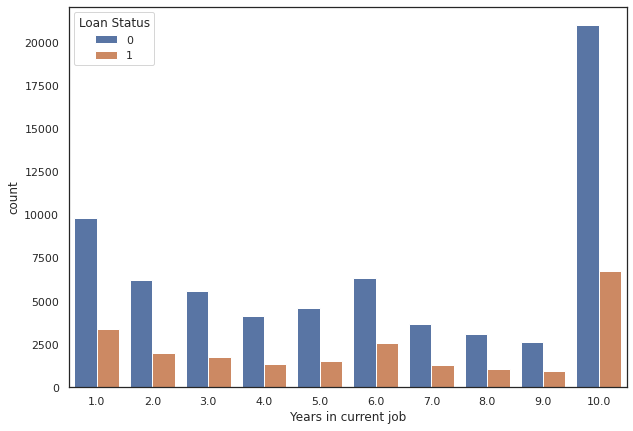

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data['Years in current job'],hue=data['Loan Status'])

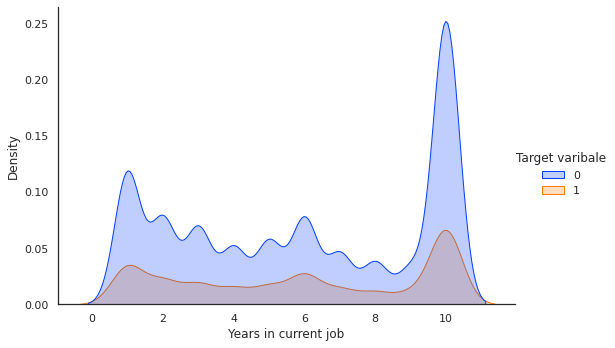

In [ ]:
#sns.displot(data=data, x='Years in current job', hue='Loan Status', kind='kde')

chart = sns.displot(data=data, x='Years in current job', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 2 : **Number of Credit Problems  vs. Loan Status**

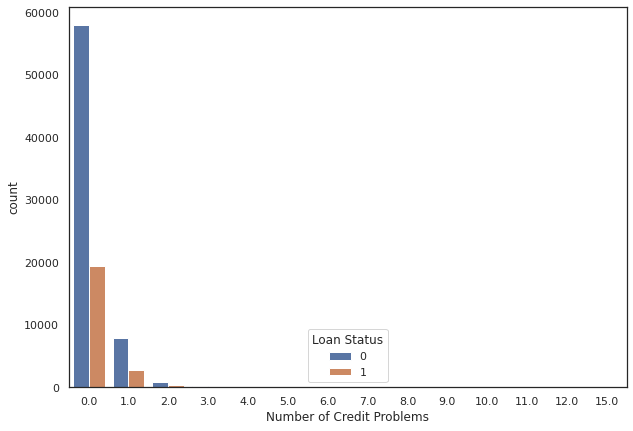

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data['Number of Credit Problems'],hue=data['Loan Status'])

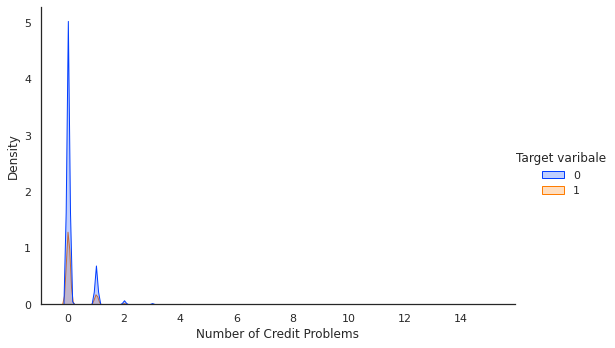

In [ ]:
#sns.displot(data=data, x='Number of Credit Problems', hue='Loan Status', kind='kde')

chart = sns.displot(data=data, x='Number of Credit Problems', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 3 : **Monthly Debt  vs. Loan Status**

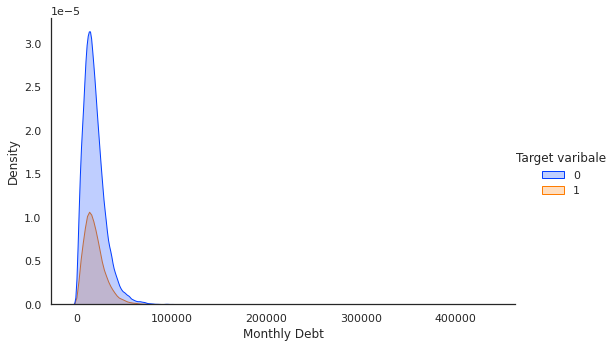

In [ ]:
#sns.displot(data=data, x='Years in current job', hue='Loan Status', kind='kde')

chart = sns.displot(data=data, x='Monthly Debt', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 4 : **Number of Open Accounts vs Loan Status**

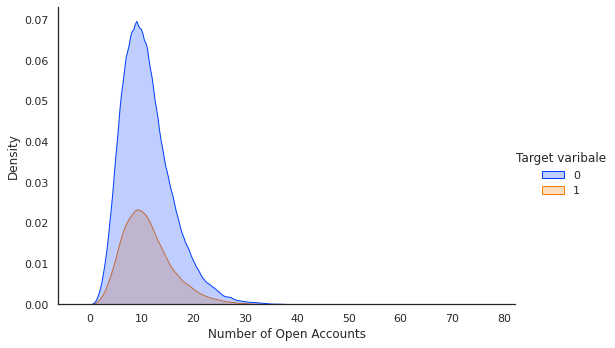

In [ ]:
#sns.displot(data=data, x='Years in current job', hue='Loan Status', kind='kde')

chart = sns.displot(data=data, x='Number of Open Accounts', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

**Next I will do analysis of the distribution of variables with a negative** **effect on the target variable:**
- Current Loan Amount      
- Annual Income            
- Years of Credit History   
- Maximum Open Credit      
- Current Credit Balance    
- Years in current job      
- Bankruptcies pogrubiony tekst pogrubiony tekst            

Variable 5 : **Current Loan Amount vs Loan Status**

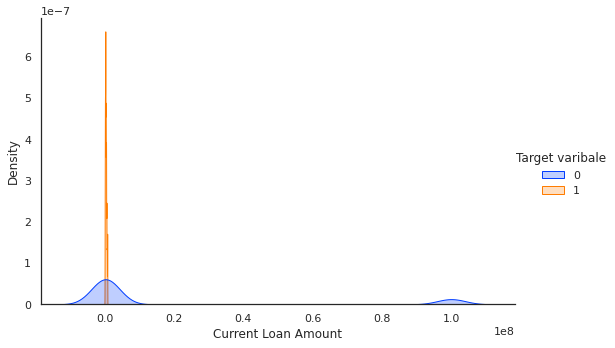

In [ ]:
#sns.displot(data=data, x='Current Loan Amount', hue='Loan Status', kind='kde')

chart = sns.displot(data=data, x='Current Loan Amount', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 6 : **Annual Income vs Loan Status** 

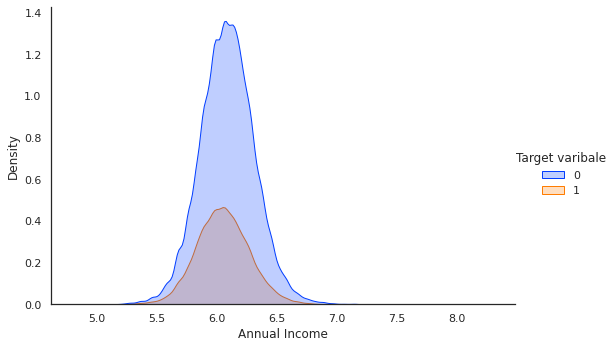

In [ ]:
#sns.displot(data=data, x='Annual Income', hue='Loan Status', kind='kde')

chart = sns.displot(data=data, x='Annual Income', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 7: **Term vs. Loan Status**

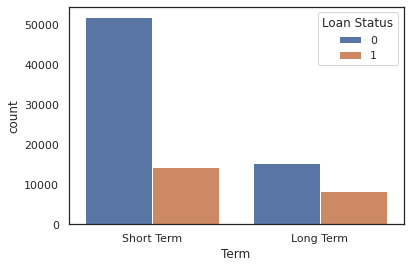

In [ ]:
sns.countplot(data['Term'],hue=data['Loan Status'])

Variable 8 : **Years of Credit History vs. Loan Status**

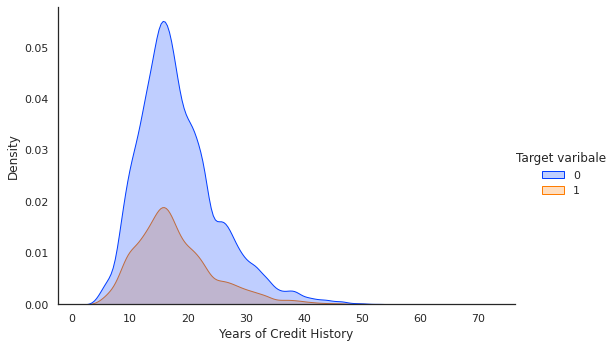

In [ ]:
chart = sns.displot(data=data, x='Years of Credit History', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 9 : **Maximum Open Credit vs. Loan Status**

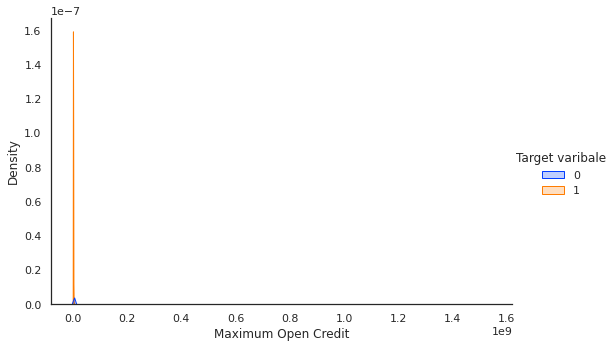

In [ ]:
chart = sns.displot(data=data, x='Maximum Open Credit', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 10 : **Current Credit Balance vs. Loan Status**

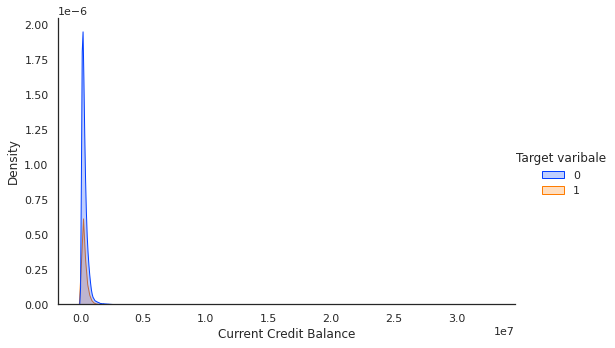

In [ ]:
chart = sns.displot(data=data, x='Current Credit Balance', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

Variable 11 : **Years in current job vs. Loan Status**

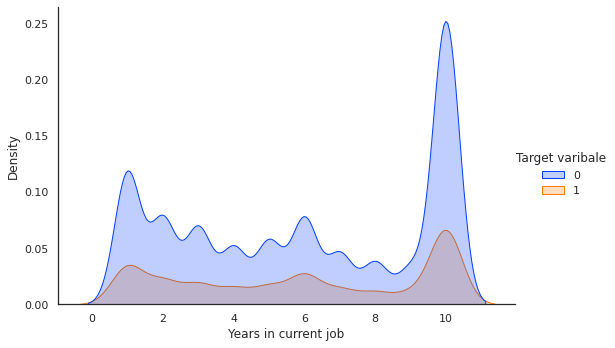

In [ ]:
chart = sns.displot(data=data, x='Years in current job', hue='Loan Status', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

## Changing title
new_title = 'Target varibale'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['0', '1']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89785 entries, 0 to 89784
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Loan Status                89785 non-null  int64   
 1   Current Loan Amount        89785 non-null  float64 
 2   Term                       89785 non-null  object  
 3   Annual Income              89785 non-null  float64 
 4   Years in current job       89785 non-null  float64 
 5   Home Ownership             89785 non-null  object  
 6   Purpose                    89785 non-null  category
 7   Monthly Debt               89785 non-null  float64 
 8   Years of Credit History    89785 non-null  float64 
 9   Number of Open Accounts    89785 non-null  float64 
 10  Number of Credit Problems  89785 non-null  float64 
 11  Current Credit Balance     89785 non-null  float64 
 12  Maximum Open Credit        89785 non-null  float64 
 13  Credit Score               8978

#### Feature encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

 Encoding Categorical Variables

**Label Encoding and One-Hot Encoding**
A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

------------------------
Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below


One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

--------------------
Let's implement the policy described above: for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [ ]:
#OrdinalEncoder
#Encode categorical features using an ordinal encoding scheme.

#OneHotEncoder
#Encode categorical features as a one-hot numeric array


In [ ]:
# Create a label encoder object. Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created.
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform  data
            data[col] = le.transform(data[col])

            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)
print( col)

1 columns were label encoded.
Credit Score


In [ ]:
# one-hot encoding of categorical variables. 
#One-hot encoding: create a new column for each unique category in a categorical variable. 
#Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
# columns_to_encode = ['Credit Score',  'Purpose' ] # for example
# data = pd.get_dummies(data, columns=columns_to_encode , drop_first=True)

data = pd.get_dummies(data , drop_first=True) 
print('Features shape: ', data.shape)

Features shape:  (89785, 22)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89785 entries, 0 to 89784
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loan Status                 89785 non-null  int64  
 1   Current Loan Amount         89785 non-null  float64
 2   Term                        89785 non-null  int64  
 3   Annual Income               89785 non-null  float64
 4   Years in current job        89785 non-null  float64
 5   Monthly Debt                89785 non-null  float64
 6   Years of Credit History     89785 non-null  float64
 7   Number of Open Accounts     89785 non-null  float64
 8   Number of Credit Problems   89785 non-null  float64
 9   Current Credit Balance      89785 non-null  float64
 10  Maximum Open Credit         89785 non-null  float64
 11  Home Ownership_Own Home     89785 non-null  uint8  
 12  Home Ownership_Rent         89785 non-null  uint8  
 13  Purpose_Debt Consolidation  897

# 3. Modelling

Since Loan Status is a classfication problem, I am going to use classfication models, also known as classifiers, to train on our model to make predictions. 
- Logistic regression
- Decision tree
- Support vector classification
- K-nearest neighbours
- Random forest


Action plan is, I will fit the models to the training and evaluate their accuracy. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.


## **Implementing ML Model**

### Splitting the Training Data

In [ ]:
### Splitting the data to the matrices X and Y using the training set.

#X = data.iloc[:, : -1].values
#Y = data.iloc[:, -1].values
x = data.drop(['Loan Status'], axis=1).values
y = data['Loan Status'].values

In [ ]:
### Dividing the dataset into train and test in the ratio of 80 : 20
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state= 42,shuffle = True, stratify=y)

In [ ]:
# getting the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :",  X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :",  y_test.shape)

Shape of X_train : (71828, 21)
Shape of X_test : (17957, 21)
Shape of y_train : (71828,)
Shape of y_test : (17957,)


### Scalling data will reduce the effect of  outliers

- StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 
- MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 
- RobustScaler it scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range.  

In [ ]:
# Robust scaler reduces the effect of ouliers
# gently better results for the RobustScaler() method than StandardScaler.
scaler = RobustScaler() # #rescale our numerical columns
#scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

### Examinig baseline models 
I'm moving on to modeling, but to start analyzing the models I start by setting a baseline! I check how the simplest model (several simple models) works - without combining with data, on default parameters

In [ ]:
# poniższe trwało 13 min

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
models = [
        LogisticRegression(), 
        DecisionTreeClassifier(), 
        SVC(), 
        KNeighborsClassifier(13), 
        RandomForestClassifier()
]

for model in models:
    print(model.__class__.__name__, cross_val_score(model, x_train, y_train, cv=5).mean())

LogisticRegression 0.7791669176346925
DecisionTreeClassifier 0.6945620104397208
SVC 0.7478559894022119
KNeighborsClassifier 0.7753800662206697
RandomForestClassifier 0.7890794935386898


In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(13),
    RandomForestClassifier() 
]

for model in models:
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)
    print(model.__class__.__name__, roc_auc_score(y_test, y_pred_proba[:, 1]))

LogisticRegression 0.7358760686684347
DecisionTreeClassifier 0.5998580382311685
SVC 0.6640592540483164
KNeighborsClassifier 0.7137481837471619
RandomForestClassifier 0.740526368294238


**Model comparison , KFold**

**!!!!!!!!!!!!!!!!!!!! Uwaga, ponizszy kod liczyl sie 2h** dlatego na późniejszym etapie używam nie n_splits=10 a  --> n_splits=3

LR: 0.747809 (0.003442)
DTC: 0.692042 (0.007617)
SVC: 0.747853 (0.003444)
kNC: 0.727727 (0.003567)
RF: 0.789698 (0.004567)


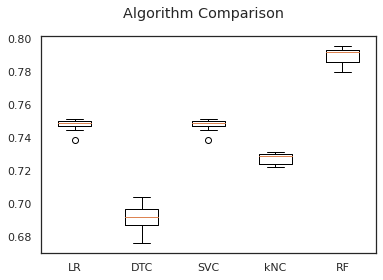

In [ ]:
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression() ))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC(probability=True) ))
models.append(('kNC', KNeighborsClassifier(13) ))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	#kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=12345) 
  kfold = model_selection.KFold(n_splits=3, shuffle = True, random_state=12345) 
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observed:**
- we see the best results on the model: RandomForestClassifier
- the weakest reasults on DecisionTreeClassifier

At this stage I will still consider all models, try to modify, change the default parameters.

### Examinig manual improvemend  

- **Manual improvemend - Logistic Regression**

In [ ]:
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)
prediction_1 = model_LR.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score  Logistic Regression with liblinear solver {0:0.4f}'. format(accuracy_score(y_test, prediction_1)))

Model accuracy score  Logistic Regression with liblinear solver 0.7477


In [ ]:
# Score report
print(classification_report(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13429
           1       0.00      0.00      0.00      4528

    accuracy                           0.75     17957
   macro avg       0.37      0.50      0.43     17957
weighted avg       0.56      0.75      0.64     17957



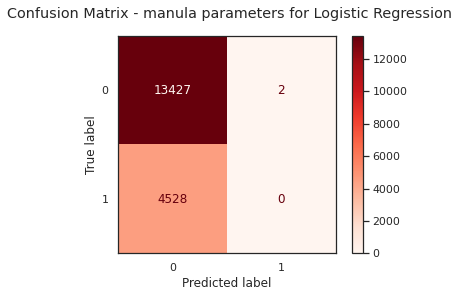

In [ ]:
# Plot
from sklearn.metrics import plot_confusion_matrix
plot_1 = plot_confusion_matrix(model_LR, X_test, y_test, display_labels=["0","1"],cmap = plt.cm.Reds,values_format = '.0f')
plot_1.figure_.suptitle("Confusion Matrix - manula parameters for Logistic Regression")
plt.show()

- **Manual improvemend - Decision Tree**

In [ ]:
# instantiate the DecisionTreeClassifier model with max_depth  and random state
model_DTC = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state = 40)
model_DTC.fit(X_train, y_train) # fit the model
prediction_2 = model_DTC.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score  Decision Tree  {0:0.4f}'. format(accuracy_score(y_test, prediction_2)))


Model accuracy score  Decision Tree  0.7839


In [ ]:
# Score report
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     13429
           1       0.73      0.23      0.34      4528

    accuracy                           0.78     17957
   macro avg       0.76      0.60      0.61     17957
weighted avg       0.77      0.78      0.74     17957



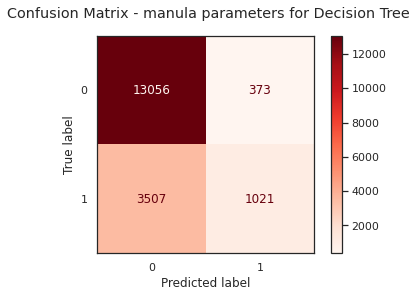

In [ ]:
# Plot
plot_2 = plot_confusion_matrix(model_DTC, X_test, y_test, display_labels=["0","1"],cmap = plt.cm.Reds,values_format = '.0f')
plot_2.figure_.suptitle("Confusion Matrix - manula parameters for Decision Tree")
plt.show()

Compare the train-set and test-set accuracy.

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
prediction_2_train = model_DTC.predict(X_train)

In [ ]:
print('Training-set accuracy for Decision Tree score: {0:0.4f}'. format(accuracy_score(y_train, prediction_2_train)))

Training-set accuracy for Decision Tree score: 0.7969


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model_DTC.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model_DTC.score(X_test, y_test)))

Training set score: 0.7969
Test set score: 0.7839


- Here, the training-set accuracy score is 0.7972 while the test-set accuracy to be 0.7837.
- These two values are quite comparable. So, there is no sign of overfitting.

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

text_representation = tree.export_text(model_DTC)
print(text_representation)

|--- feature_19 <= 0.50
|   |--- feature_0 <= 50394625.00
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_20 <= 0.50
|   |   |   |   |--- feature_2 <= 6.14
|   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 16279.67
|   |   |   |   |   |   |   |--- feature_2 <= 5.89
|   |   |   |   |   |   |   |   |--- feature_0 <= 394240.00
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_3 >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  394240.00
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_6 >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  5.89
|   |   |   |   |   |   |   |   |--- feature_5 <= 38.65
|   |   |  

- **Manual improvemend - Support vector classification**

In [ ]:
# instantiate classifier with rbf kernel and C=100
model_SVC = SVC(C = 100) #higher C means fewer outliers
model_SVC.fit(X_train,y_train)
prediction_3 = model_SVC.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score  Support vector classification with C = 100 : {0:0.4f}'. format(accuracy_score(y_test, prediction_3)))

Model accuracy score  Support vector classification with C = 100 : 0.7479


In [ ]:
# Score report
print(classification_report(y_test,prediction_3))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13429
           1       1.00      0.00      0.00      4528

    accuracy                           0.75     17957
   macro avg       0.87      0.50      0.43     17957
weighted avg       0.81      0.75      0.64     17957



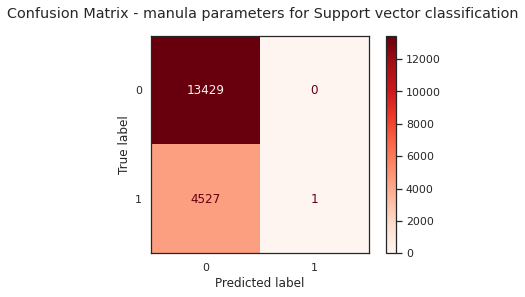

In [ ]:
# Plot
plot_3 = plot_confusion_matrix(model_SVC, X_test, y_test, display_labels=["0","1"],cmap = plt.cm.Reds,values_format = '.0f')
plot_3.figure_.suptitle("Confusion Matrix - manula parameters for Support vector classification")
plt.show()

- **Manual improvemend - K-nearest neighbours**

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = 100)
model_KNN.fit(X_train,y_train)
prediction_4 = model_KNN.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score  KNeighborsClassifier with n-neighbors = 100 : {0:0.4f}'. format(accuracy_score(y_test, prediction_4)))

Model accuracy score  KNeighborsClassifier with n-neighbors = 100 : 0.7481


In [ ]:
# Score report
print(classification_report(y_test,prediction_4))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13429
           1       0.59      0.00      0.01      4528

    accuracy                           0.75     17957
   macro avg       0.67      0.50      0.43     17957
weighted avg       0.71      0.75      0.64     17957



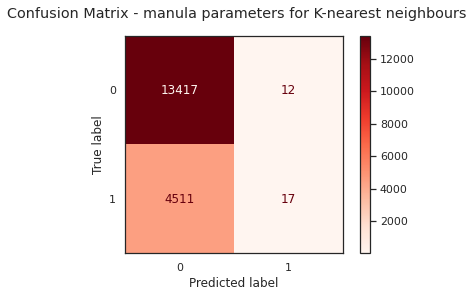

In [ ]:
# Plot
plot_4 = plot_confusion_matrix(model_KNN, X_test, y_test, display_labels=["0","1"],cmap = plt.cm.Reds,values_format = '.0f')
plot_4.figure_.suptitle("Confusion Matrix - manula parameters for K-nearest neighbours")
plt.show()

- **Manual improvemend - Random forest**

In [ ]:
model_RFC = RandomForestClassifier(n_estimators=50 , max_features=5 ,    max_depth=6)
model_RFC.fit(X_train,y_train)
prediction_5 = model_RFC.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score for Random Forest: {0:0.4f}'. format(accuracy_score(y_test, prediction_5)))

Model accuracy score for Random Forest: 0.7882


In [ ]:
# Score report
print(classification_report(y_test,prediction_5))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     13429
           1       0.86      0.19      0.31      4528

    accuracy                           0.79     17957
   macro avg       0.82      0.59      0.59     17957
weighted avg       0.80      0.79      0.73     17957



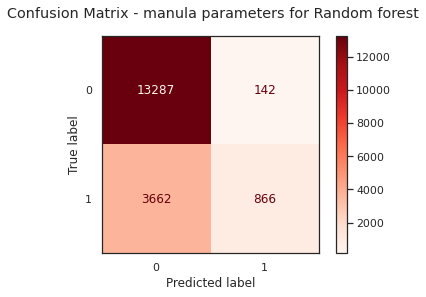

In [ ]:
# Plot
plot_3 = plot_confusion_matrix(model_RFC, X_test, y_test, display_labels=["0","1"],cmap = plt.cm.Reds,values_format = '.0f')
plot_3.figure_.suptitle("Confusion Matrix - manula parameters for Random forest")
plt.show()

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model_RFC.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model_RFC.score(X_test, y_test)))

Training set score: 0.7869
Test set score: 0.7882


**Observed:**
- **In summary, on all models, making small parameter changes improved the results.** 

- **But I will continue to look for the best model that is both good, but also allows to understand the problem under analysis.**

### Model - GridSearchCV with Decision Tree

In [ ]:
Tree = DecisionTreeClassifier()

In [ ]:
# Instantiate the GridSearchCV object and run the search
parameter_grid = {'max_depth': [2, 5, 6],
                  'max_features': [5, 8 ],
                  'min_samples_leaf' : [200, 500, 700 ], 
                  'random_state':[1, 2],
                  'criterion':['gini','entropy'],
                  'max_leaf_nodes': [5, 10, 15]
                 }

grid_search = GridSearchCV(Tree, param_grid = parameter_grid, cv =10)

grid_search.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print ("Best Score: {}".format(grid_search.best_score_)) #print ("R-Squared::{}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))


# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", grid_search.score(X_test, y_test))

Best Score: 0.784415559216075
Best params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 200, 'random_state': 1}
Test accuracy of best grid search hypers: 0.7859887509049396


An approach to finding optimal parameters:
- **first iteration**:
  - best params: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 20 'min_samples_leaf': 50, 'random_state': 5}
  - best Score: 0.7876197361727337
  - test accuracy of best grid search hypers: 0.789009445008196

- **second iteration**:
  - Best Score: 0.780165018098527
  - Best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 150, 'random_state': 5}
  - Test accuracy of best grid search hypers: 0.78249160877371

- **third iteration**: 
    - Best Score: 0.7760376214613653
    - Best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 500, 'random_state': 1}
    - Test accuracy of best grid search hypers: 0.7775349309187417

I added one more criterion to the above: max_leaf_nodes
- **fourts iteration**
    - Best Score: 0.784415559216075
    - Best params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 200, 'random_state': 1}
    - Test accuracy of best grid search hypers: 0.7859887509049396

**I choose the model from the last itearation even though it is a little weaker but still good (78.76% --> 78.44%) it will be easier to explain because it is me complex, fewer variables and less depth of the tree.**

In [ ]:
#best_Tree = DecisionTreeClassifier(max_depth=7,criterion='gini',max_features=9,random_state=0) #final_model = grid_search.best_estimator_
best_Tree = DecisionTreeClassifier(**grid_search.best_params_)
best_Tree #final_model
#
best_Tree.fit(X_train,y_train)
pred=best_Tree.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred,average=None))
print('\n')
print('Train Accuracy: ', accuracy_score(y_train, best_Tree.predict(X_train))*100,'%')


              precision    recall  f1-score   support

           0       0.78      0.99      0.87     13429
           1       0.83      0.19      0.31      4528

    accuracy                           0.79     17957
   macro avg       0.81      0.59      0.59     17957
weighted avg       0.79      0.79      0.73     17957



F1-SCORE :  [0.87333136 0.31067265]


Train Accuracy:  78.5000278442947 %


In [ ]:
df = pd.DataFrame(data=grid_search.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050199,0.003787,0.001800,0.000183,gini,2,5,5,200,1,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 200, 'random_state': 1}",0.773632,0.770569,0.771405,0.770987,0.762912,0.769177,0.772658,0.766811,0.773322,0.773044,0.770452,0.003207,124
1,0.039971,0.002451,0.001809,0.000304,gini,2,5,5,200,2,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 200, 'random_state': 2}",0.747877,0.747877,0.747877,0.747877,0.747877,0.747877,0.747877,0.747738,0.747842,0.747842,0.747856,0.000042,187
2,0.049164,0.005015,0.001845,0.000322,gini,2,5,5,500,1,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 500, 'random_state': 1}",0.774050,0.769177,0.771544,0.771265,0.761799,0.767785,0.772797,0.766114,0.773461,0.773322,0.770132,0.003728,131
3,0.037818,0.001048,0.001662,0.000074,gini,2,5,5,500,2,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 500, 'random_state': 2}",0.747877,0.747877,0.747877,0.747877,0.747877,0.747877,0.747877,0.747738,0.747842,0.747842,0.747856,0.000042,187
4,0.047953,0.003212,0.001707,0.000059,gini,2,5,5,700,1,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 700, 'random_state': 1}",0.774050,0.769177,0.771544,0.771265,0.761799,0.767785,0.772797,0.766114,0.773461,0.773322,0.770132,0.003728,131


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

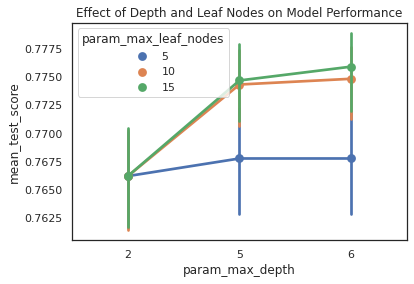

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

**Observed**
**Comments**
- **Our original model accuracy is 69.3% while GridSearch  score is 77.75%.
So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model**.

### Dealing with imbalanced data
https://svds.com/learning-imbalanced-classes/

### Oversampling. Overcoming imbalance problem

#### Over-sampling: SMOTE
(Synthetic Minority Oversampling TEchnique) It is believed that SMOTE performs better when combined with undersampling of the majority class, such as random undersampling.

In [ ]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
x_over = data.drop(['Loan Status'], axis=1)
y_over = data['Loan Status']

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')   # it means that oversample the minority class
X_sm, y_sm = smote.fit_resample(x_over, y_over)

In [ ]:
y_sm.value_counts()

0    67146
1    67146
Name: Loan Status, dtype: int64

#### Over-sampling followed by under-sampling
Let's check combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek() 
X_smt1, y_smt1 = smt.fit_resample(x_over, y_over)

In [ ]:
y_smt1.value_counts()

0    64050
1    64050
Name: Loan Status, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)
Tree_after_smoteT = DecisionTreeClassifier()

Tree_after_smoteT.fit(X_train , y_train)
print(Tree_after_smoteT.score(X_train , y_train))
print(Tree_after_smoteT.score(X_test , y_test))

1.0
0.7669398907103825


In [ ]:
#Something came out suspiciously well score on th train set value of 1, while on the test   0.76808

From GridSearch I find out the best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 200, 'random_state', so I am going to implement them.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)
Tree_after_smoteT_best = DecisionTreeClassifier(**grid_search.best_params_)

Tree_after_smoteT_best.fit(X_train , y_train)
print(Tree_after_smoteT_best.score(X_train , y_train))
print(Tree_after_smoteT_best.score(X_test , y_test))

0.7719262295081967
0.7704137392661983


The above results are more satisfactory because the result on the training set deviates less from the result on the test set. Our original model accuracy is 69.3% while GridSearch score is 77.75%. So, GridSearch CV and implementing oversampling by under-samplig bring me even better resaults: 77.71

## **Model Explanation**

### Feature importances

In [ ]:
#zmienne_ =  list(data)
#print(zmienne_)

#zmienne = X_train.columns
#print(zmienne)

In [ ]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, Tree_after_smoteT_best.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [ ]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

,Feature,Importance
0,Credit Score_3. 730 - 742,0.286839
1,Credit Score_missing data,0.258103
2,Current Loan Amount,0.198873
3,Credit Score_2. 709 - 729,0.194571
4,Purpose_Other,0.032353
5,Number of Credit Problems,0.010053
6,Term,0.008321
7,Annual Income,0.006944
8,Years in current job,0.003944
9,Monthly Debt,0.000000


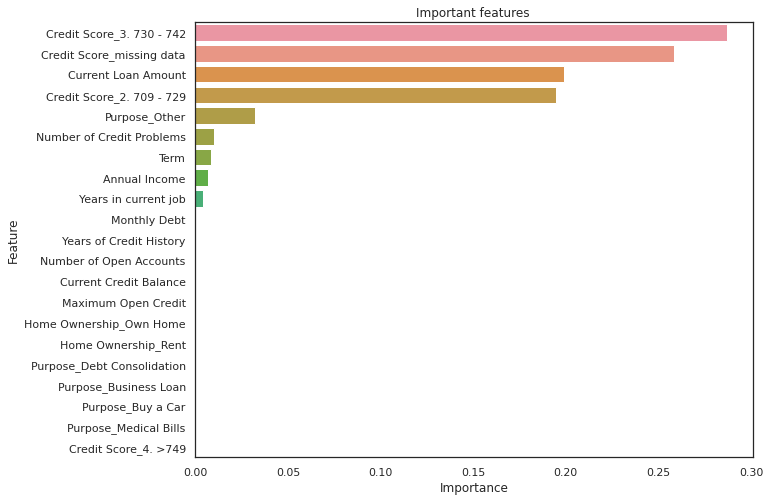

In [ ]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
#clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values).set(title='Important features ') # sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features ')
plt.show()

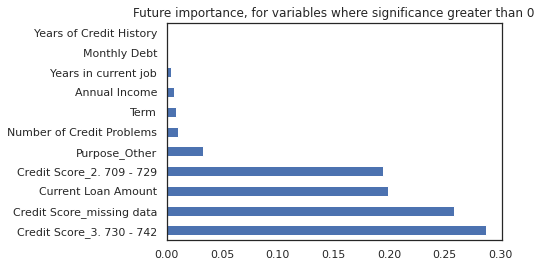

In [ ]:
feat_importances = pd.Series(Tree_after_smoteT_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh', title='Future importance, for variables where significance greater than 0')

**Observed**

From the graph above, we can see that only the first 8 variables are significant, while the others are not from 9 to 20. Improving this analysis, it would be possible to investigate whether if we remove these variables the model is better or not.

Included are such variables as:
- Number of Credit Problems - a bit surprising, I expected this to be a highly correlated and influential variable 
- Monthly Debt 
- Years of Credit History  
- Number of Open Accounts 
- Current Credit Balance 
- Maximum Open Credit 

### Tree map

In [ ]:
X_train.columns.tolist()

['Current Loan Amount',
 'Term',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_Debt Consolidation',
 'Purpose_Other',
 'Purpose_Business Loan',
 'Purpose_Buy a Car',
 'Purpose_Medical Bills',
 'Credit Score_2. 709 - 729',
 'Credit Score_3. 730 - 742',
 'Credit Score_4. >749',
 'Credit Score_missing data']

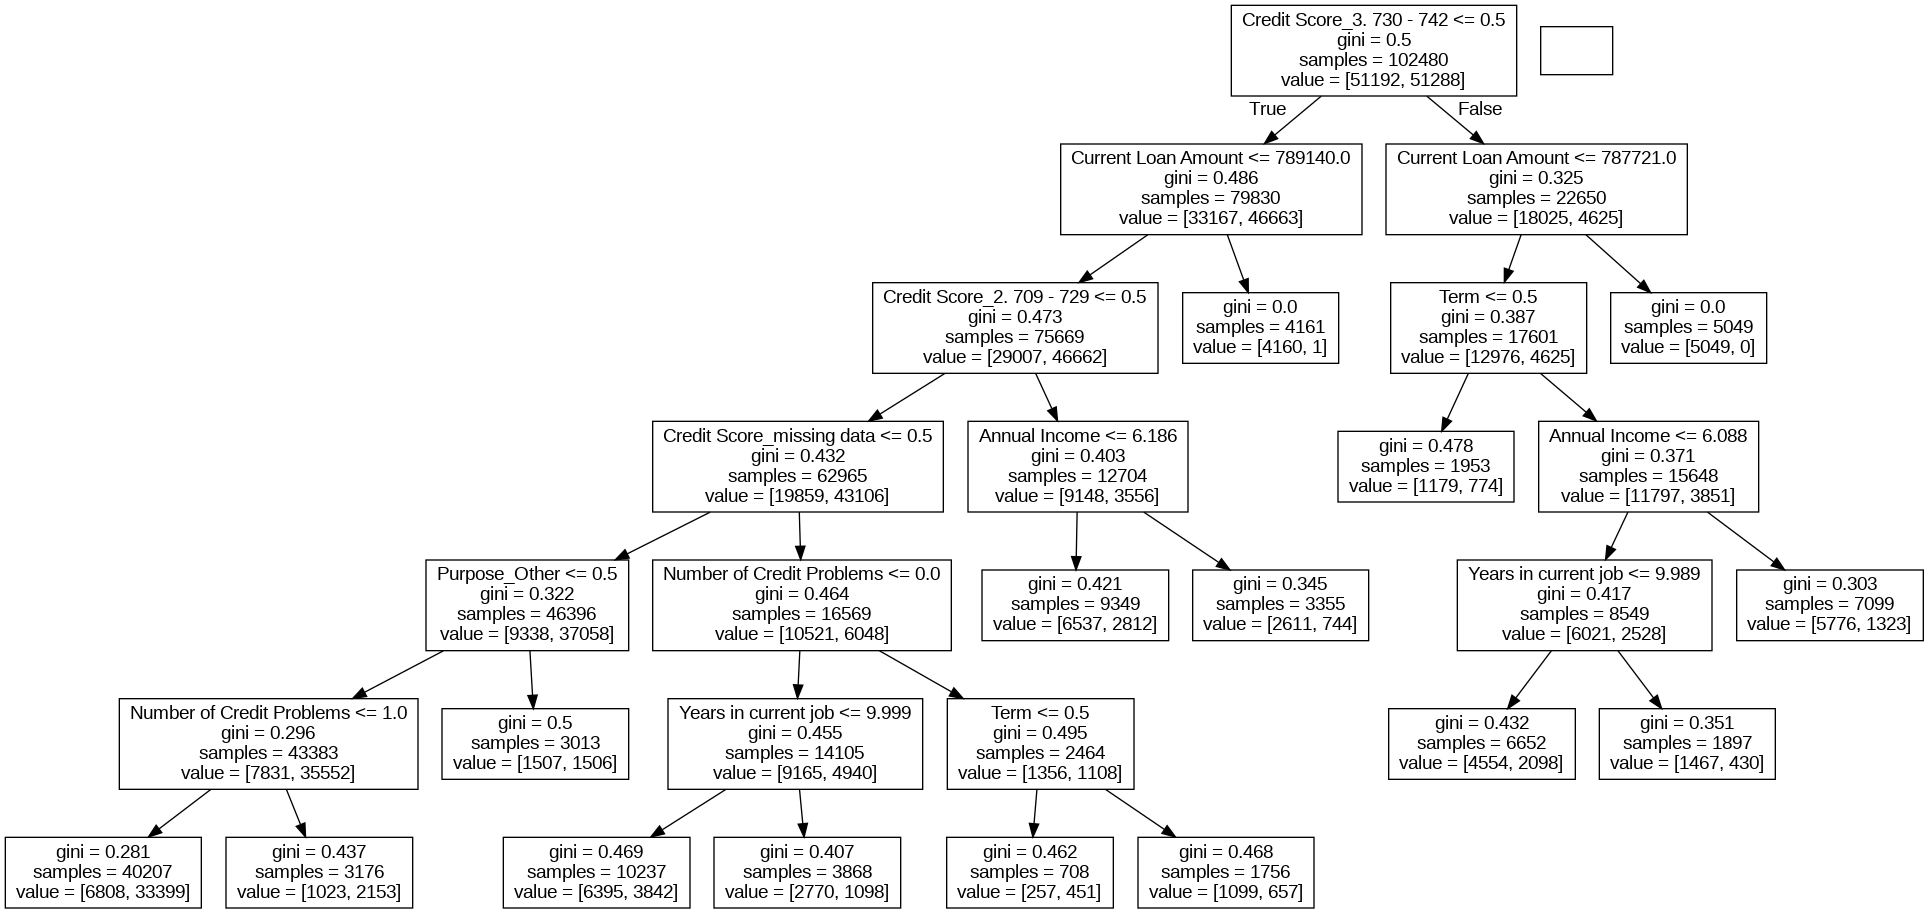

In [ ]:
# show tree map
#plot_tree(best_Tree, feature_names=list(X), class_names=["1","0"]) #Tree

import graphviz 
from graphviz import Source
#dot_data = tree.export_graphviz(Tree_after_smoteT_best, out_file=None, feature_names= X_train.columns) 
dot_data = tree.export_graphviz(Tree_after_smoteT_best, out_file=None, feature_names= X_train.columns.tolist()) 
graph = graphviz.Source(dot_data) 
graph.render("Treee do sprawdzania",view = True)
import pydotplus # installing pyparsing maybe needed
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Observed**

Another tool to understand the problem under study is the tree diagram analysis. As you can see, it is extended one way - the left - , which would probably require exploring and seeing if just throwing out the above-mentioned variables would help.

The solution, too, may be to cut the tree, to a depth of, say, 4. 

### Eli5 Values

Another way to assess the global importance of the predictors is to randomly permute the order of the instances for each feature in the dataset and predict with the trained model. If by doing this disturbance in the order, the evaluation metric does not change substantially, then the feature is not so relevant. If instead the evaluation metric is affected, then the feature is considered important in the model. This process is done individually for each feature.

In [ ]:
# let's check the importance of each attributes

# Train
perm_train = PermutationImportance(Tree_after_smoteT_best, scoring = 'roc_auc', random_state=1984).fit(X_train, y_train)
eli5.show_weights(perm_train, feature_names = X_train.columns.tolist())

Weight,Feature
0.1061 ± 0.0018,Credit Score_3. 730 - 742
0.0856 ± 0.0022,Credit Score_2. 709 - 729
0.0845 ± 0.0012,Current Loan Amount
0.0645 ± 0.0008,Credit Score_missing data
0.0080 ± 0.0006,Term
0.0080 ± 0.0004,Purpose_Other
0.0043 ± 0.0005,Annual Income
0.0040 ± 0.0002,Number of Credit Problems
0.0029 ± 0.0003,Years in current job
0 ± 0.0000,Purpose_Medical Bills


In [ ]:
# Test
perm_test = PermutationImportance(Tree_after_smoteT_best, scoring = 'roc_auc', random_state=1984).fit(X_test, y_test)
eli5.show_weights(perm_test, feature_names = X_test.columns.tolist())

Weight,Feature
0.1096 ± 0.0025,Credit Score_3. 730 - 742
0.0865 ± 0.0015,Credit Score_2. 709 - 729
0.0855 ± 0.0033,Current Loan Amount
0.0627 ± 0.0022,Credit Score_missing data
0.0076 ± 0.0008,Term
0.0075 ± 0.0009,Purpose_Other
0.0048 ± 0.0008,Annual Income
0.0035 ± 0.0008,Number of Credit Problems
0.0031 ± 0.0012,Years in current job
0 ± 0.0000,Purpose_Medical Bills


**Observed**

As can be seen above, the order of the most important features remains unchanged. In addition, we have confirmation on both sets. In fact, we have confirmation of what the decision tree showed us, there admittedly there was a slightly different order, but the number of these 8 variables is the same.

Consistency between different approaches to the approximation of global significance generates more confidence in the interpretation of the model output.


The credit score variable has the strongest effect for the range 730 - 742, followed by the range with missing data

### Partial Dependence Plot

- **Variable: Credit Score_3. 730 - 742**

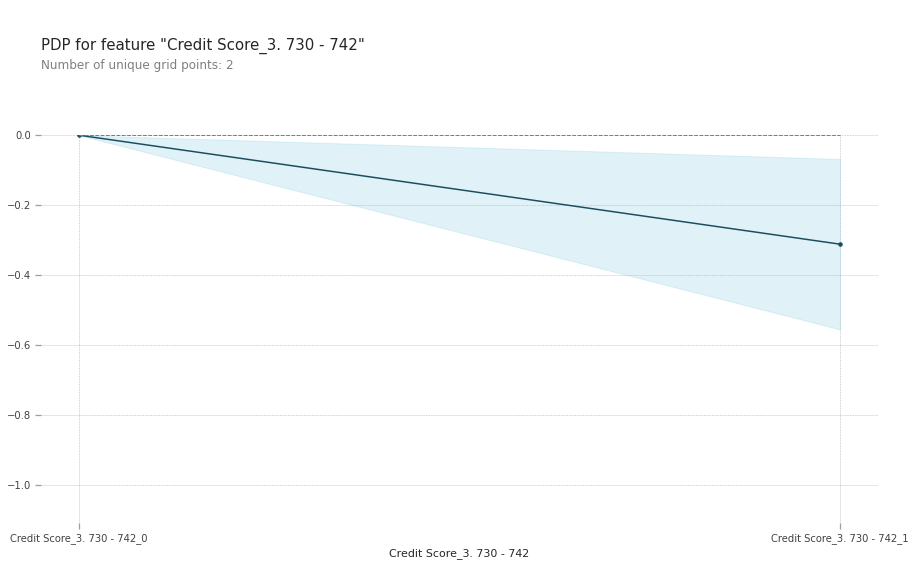

In [ ]:
feat_name = 'Credit Score_3. 730 - 742'
pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=X_test, model_features = X_test.columns, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

- **Variable: Credit Score_missing data**

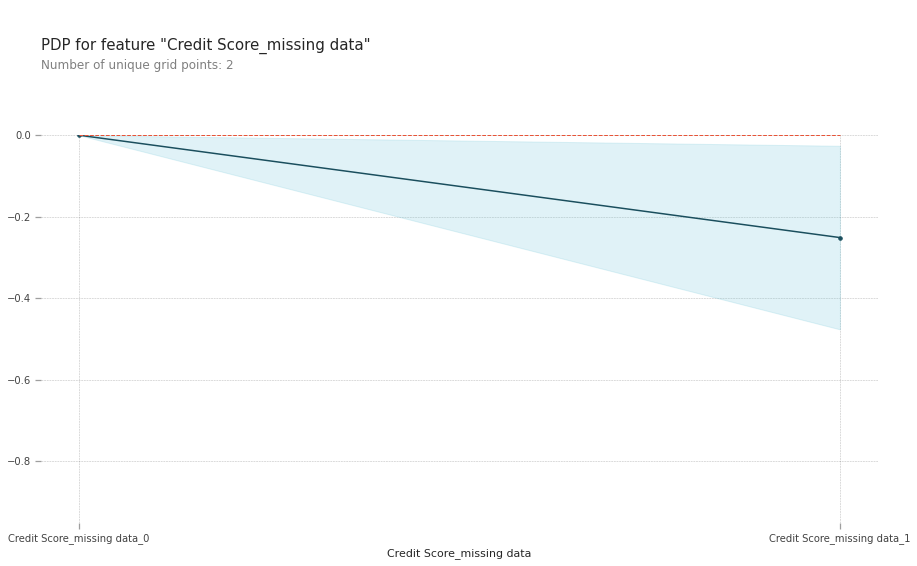

In [ ]:
feat_name = 'Credit Score_missing data'
pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=X_test, model_features = X_test.columns, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

- **Varibale: Current Loan Amount**

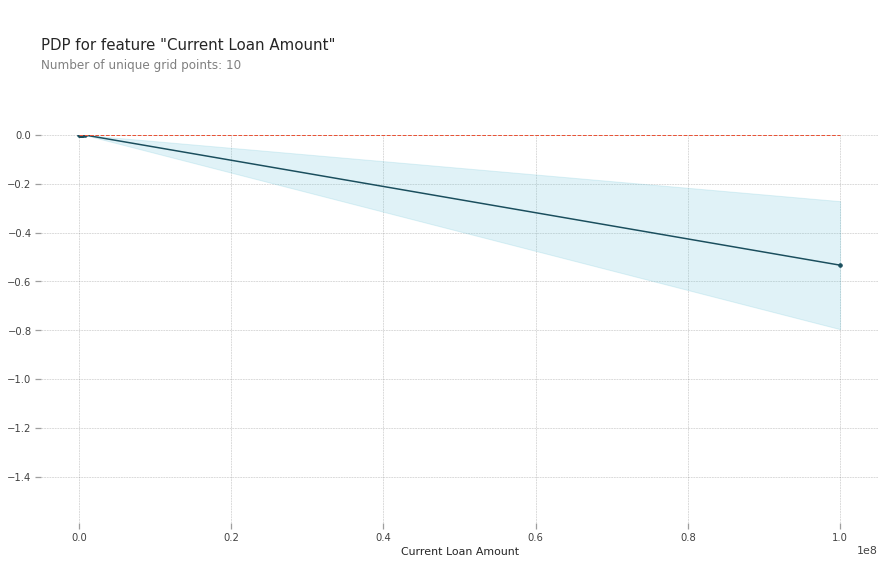

In [ ]:
# plotting the partial dependence plot for Current Loan Amount
# base_features_my =  list(data)
# print(base_features_my)
# base_features_ = X.columns.values.tolist()
# print(base_features)

feat_name = 'Current Loan Amount'
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=x_test, model_features = base_features, feature = feat_name)
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=data.drop(["Loan Status"], axis = 1), model_features = base_features, feature = feat_name)
pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=X_test, model_features = X_test.columns, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

**Variable: Credit Score_2. 709 - 729**

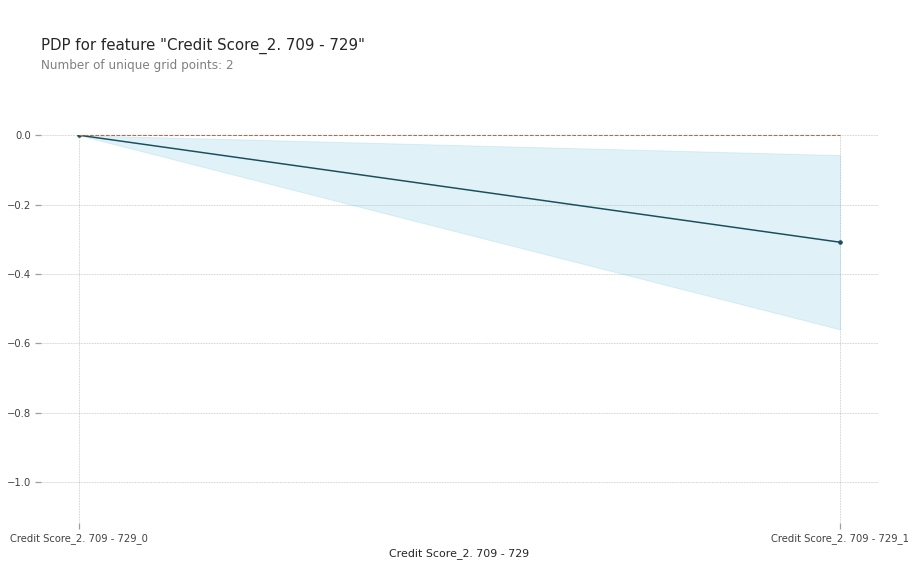

In [ ]:
feat_name = 'Credit Score_2. 709 - 729'
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=x_test, model_features = base_features, feature = feat_name)
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=data.drop(["Loan Status"], axis = 1), model_features = base_features, feature = feat_name)
pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=X_test, model_features = X_test.columns, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

**Variable: Years in current job**

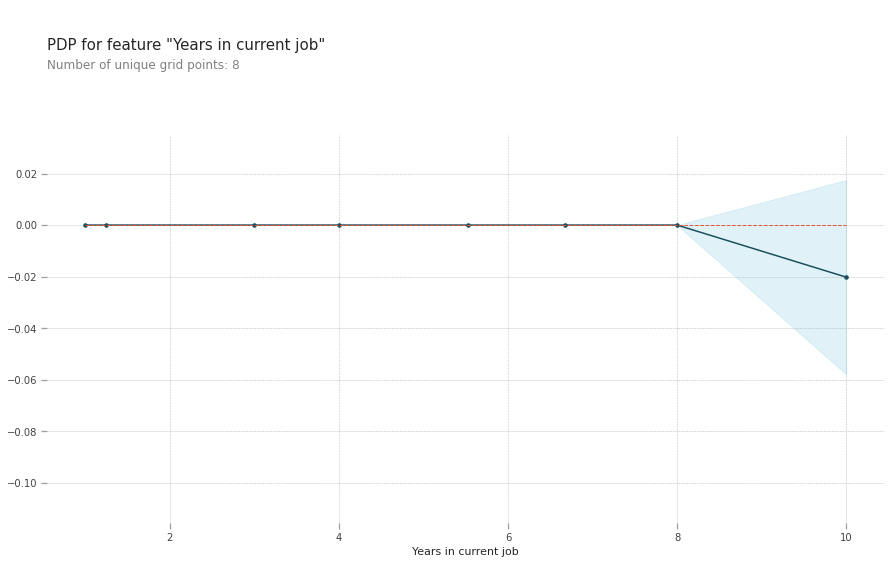

In [ ]:
feat_name = 'Years in current job'
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=x_test, model_features = base_features, feature = feat_name)
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=data.drop(["Loan Status"], axis = 1), model_features = base_features, feature = feat_name)
pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=X_test, model_features = X_test.columns, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

**Variable: Term**

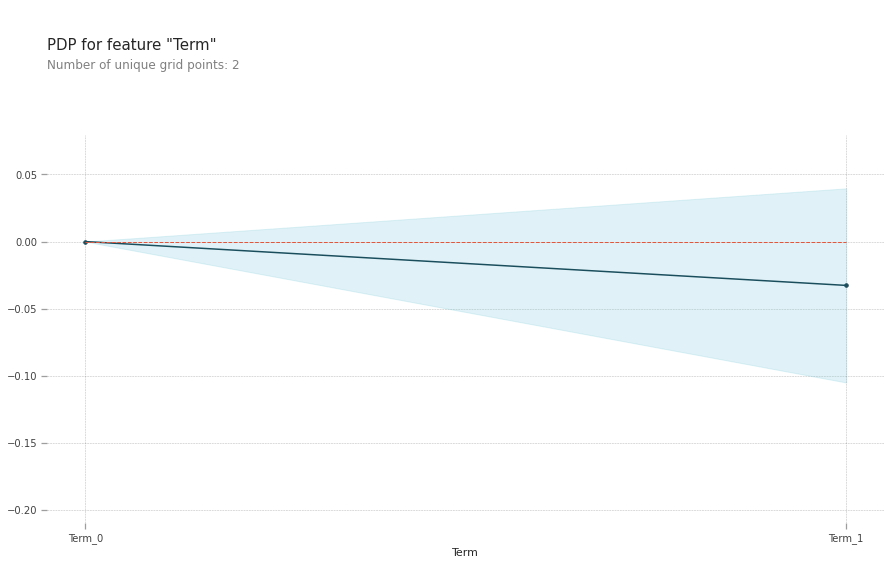

In [ ]:
feat_name = 'Term'
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=x_test, model_features = base_features, feature = feat_name)
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=data.drop(["Loan Status"], axis = 1), model_features = base_features, feature = feat_name)
pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=X_test, model_features = X_test.columns, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

**Observed**

- The value of the variable Term = 0 , is an assignment to class 0, and when term takes the value of 1 then we have a partial assignment to class 0, and a little more to class 1

**Variable: Annual Income**

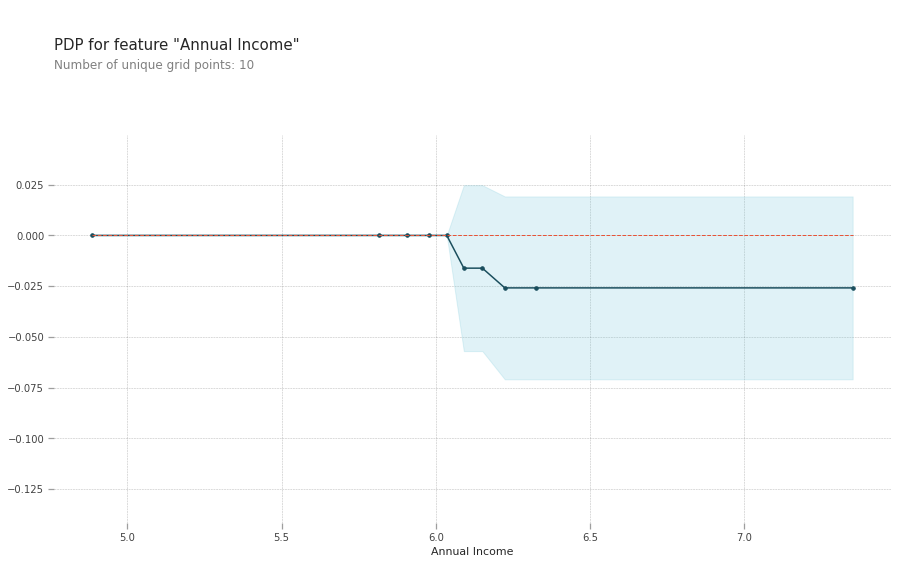

In [ ]:
feat_name = 'Annual Income'
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=x_test, model_features = base_features, feature = feat_name)
#pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=data.drop(["Loan Status"], axis = 1), model_features = base_features, feature = feat_name)
pdp_dist = pdp.pdp_isolate(model=Tree_after_smoteT_best, dataset=X_test, model_features = X_test.columns, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

**Observed**
 -  Annual Income below a value of 6 points very strongly toward class 0, with no growth observed here. Anything greater than 6.25 has the same end result, partial class zero partial class 1.

### Shap Value

The SHAP Summary Plot is a very interesting plot to evaluate the features of the model, since it provides more information than the traditional Feature Importance:

- Feature Importance: variables are sorted in descending order of importance.


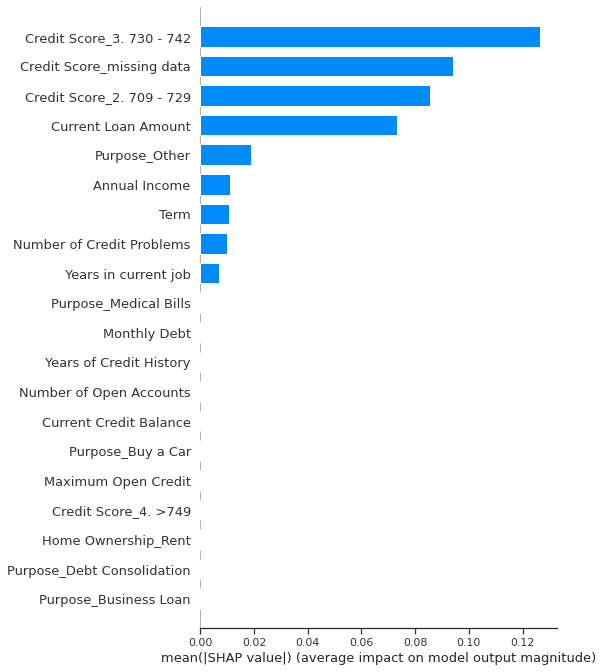

In [ ]:
# let's see the shap values

explainer = shap.TreeExplainer(Tree_after_smoteT_best)
shap_values = explainer.shap_values(X_test)

#shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

The SHAP Summary Plot provides more information than the traditional Feature Importance:

- Impact on Prediction: the position on the horizontal axis indicates whether the values of the dataset instances for each feature have more or less impact on the output of the model. //Horizontal position: indicates whether the impact of this value is associated with a higher forecast or a lower one (everything to the left of 0 affects negatively and everything to the right affects positively).//
- Original Value: the color indicates, for each feature, whether it is a high or low value (in the range of each of the feature). //Color: shows whether the variable takes high values (red) or low values (blue) for this observation.//
- Correlation: the correlation of a feature with the model output can be analyzed by evaluating its color (its range of values) and the impact on the horizontal axis. 
- Distribution of dots: in addition, you can read the simplified distribution of the variable. A lot of dots in one place means that most of the observations are in that one place.

For example, it is observed that the credit score ranges: 730-742, missing data, and 709 - 729 has a positive correlation with the target, since the impact on the output increases as the value of the feature increases.

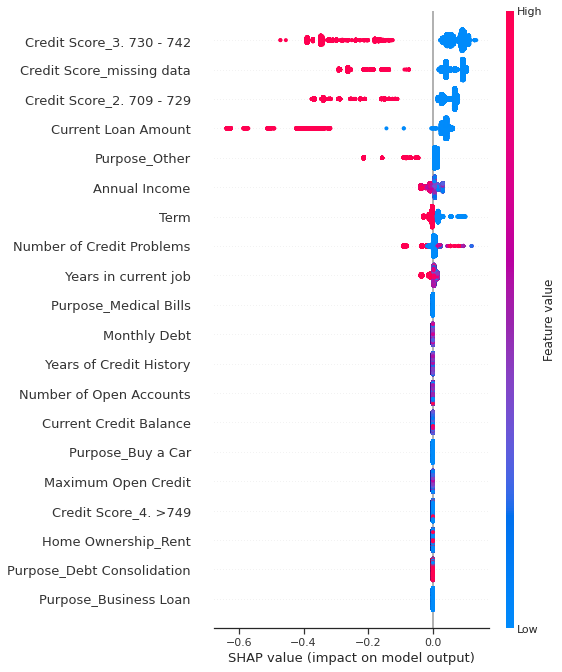

In [ ]:
shap.summary_plot(shap_values[1], X_test)

### Force Plot

Local interpretability - graph for a single observation

The force plot indicates, for each feature, the impact it had on the prediction. There are two relevant values to notice: the output value (model prediction for the instance) and the base value (average prediction for the entire dataset). A bigger bar means a higher impact and the color indicates if the feature value moved the prediction from the base value towards 1 (red) or 0 (blue).


During the conversion, each observation was given its own set of SHAP values. Thus, for each observation, we can see how each variable in the model influenced and to what extent the model made that decision. We can explain simply and transparently why the model returned such a prediction. Local interpretability allows us to identify and test the influence of each factor.

In [ ]:
# define function to make force plot
def show_forceplot(Tree_after_smoteT_best, data):
  explainer = shap.TreeExplainer(Tree_after_smoteT_best)
  shap_values = explainer.shap_values(data)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], data)

In [ ]:
tmp = X_test.iloc[1,:].astype(float)
show_forceplot(Tree_after_smoteT_best, tmp)

Let's describe what can be seen in the graph:

- output value - this is the predicted value for our observation (let's display the result for our first observation ) by our model. In this case, it is 0.83, which is higher than the average for the observations.
- base value - this is the average prediction value returned for our observations, it is: 0.5005

- Colors: variables (features) contribute to Target = 1, credit in "charged off" status are shown in red, and those that reduce the prediction in blue ( Target = 1, credit full paid). The features are arranged in the order which most influenced plus and minus, respectively.
For this example, the most on the credit in the status "charged off influenced the value of the feature : credit score 3: 730-742 =0 , followed by Credit Score missing data = 0 and then credit score 2: 709-729 =0, followed by credit loan maount

In [ ]:
tmp = X_test.iloc[2, :].astype(float)
show_forceplot(Tree_after_smoteT_best, tmp)

Let's describe what can be seen - resault for send observation

output value - this is the predicted value for our observation by our model. In this case, it is 0.00, which is lover than the average for the observations.

base value - this is the average prediction value returned for our observations, it is: 0.5005

Colors: variables (features) contribute to Target = 1, credit in "charged off" status are shown in red,feature : credit score 3: 730-742 =0 , followed by Credit Score missing data = 0. 
And those that reduce the prediction in blue ( Target = 0, credit full paid) is current loand amount.



Above we had a summary for a single observation. On the other hand, if we take multiple explanations like the one shown above, rotate them 90 degrees, and then arrange them horizontally then **we can see explanations for the entire data set**

In [ ]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

## **Results and conclusion** 


In this project, I was concerned with building a model that would predict a credit loand with a "Charged off" status,

- the first step was to prepare the data for the next step, filling in data gaps, filling in the gaps, scaling and recoding to numeric values so as to use them in the model,

- the next step was to compare several models (Logistic Regression, Decision Tree, SVC, KNeighborsClassifier, RandomForestClassifier ) with default settings to recognize predictive capabilities with the underlying models. At this stage, it was already clear that the Decision-Tree Classifier model had the weakest performance (accuracy per test: 0.5998),

- However, even after a slight modification of the parameters, manually managed to get a better model for all models, and for Decision Tree (accuracy per test: 0.7839 ), 

- so in the end I stayed with the search for a set of parameters using GridSearch, just for Decision Tree which gave even better results (AUC per test: 0.7859), 

- final these best parameters were used in the SMOTE algorithm, oversampling and then undersampling: 
  AUC per train set: 0.77192 
  AUC on the test set: 0.770413
In both cases, the train-set and test-set result are very close certainly due to the elimination of the problem of the unbalanced set,

- The last step is to try to understand the model both decision tree, Tree map option , and more advanced tools: partial dependece plot, shap value or force plot. 


Next steps:
In the end, despite the good results, from the analysis it came out that several variables are irrelevant, so in order to develop it, it would be necessary to remove them, which will certainly simplify the models and it will be possible to check / make sure that we still get such good results